In [0]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

#Classifier Train Set

In [0]:
#Load Data
dev1=pd.read_csv('/content/drive/My Drive/Project Future/Project/data/devices.csv')
ntf_1=pd.read_csv('/content/drive/My Drive/Project Future/Project/data/notifications.csv')
tr1_1=pd.read_csv('/content/drive/My Drive/Project Future/Project/data/transactions_1.csv')
tr1_2=pd.read_csv('/content/drive/My Drive/Project Future/Project/data/transactions_2.csv')
tr1_3=pd.read_csv('/content/drive/My Drive/Project Future/Project/data/transactions_3.csv')
us1=pd.read_csv('/content/drive/My Drive/Project Future/Project/data/users.csv')

In [0]:
#Merge of transactions files
tr1=pd.DataFrame()
tr1=tr1.append(tr1_1)
tr1=tr1.append(tr1_2)
tr1=tr1.append(tr1_3)

##Users File

###**Unique Values**

In [4]:
users=us1
colnames=users.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(users[cn])),"UniqueVal":len(users[cn].unique())},ignore_index=True)

df

,Column,NumOfMissingVal,UniqueVal
0,user_id,0,15544
1,birth_year,0,69
2,country,0,40
3,city,0,5197
4,created_date,0,15544
5,user_settings_crypto_unlocked,0,2
6,plan,0,3
7,attributes_notifications_marketing_push,5260,3
8,attributes_notifications_marketing_email,5260,3
9,num_contacts,0,283


In [0]:
#Drop unnecessary columns
#print(users.shape)
#users=users.drop(labels={"num_successful_referrals","num_referrals","city","created_date","attributes_notifications_marketing_email","attributes_notifications_marketing_push"},axis=1)
#print(users.shape)
#users.columns

In [6]:
users.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals'],
      dtype='object')

In [7]:
colnames=users.columns
for cn in colnames[1:3].append(colnames[5:9].append(colnames[10:12])):
  print(cn,"\n" , users[cn].unique(),"\n")

birth_year 
 [1992 1985 1996 1981 1990 1998 2000 1949 1960 1980 1962 1978 1995 1994
 1979 1965 1997 1959 1957 1983 1986 1976 1991 1982 1946 1989 1973 1993
 1977 1987 1999 1971 1975 1966 1988 1961 1958 1972 1974 1984 1968 1942
 1950 1967 1970 1964 1956 1963 1941 1944 1954 1945 1947 1969 1955 1952
 1948 1953 1951 1943 2001 1929 1940 1937 1935 1938 1934 1939 1930] 

country 
 ['ES' 'LT' 'IE' 'GB' 'MT' 'FR' 'RO' 'PL' 'AT' 'IT' 'SI' 'CZ' 'BE' 'BG'
 'GI' 'CH' 'GG' 'CY' 'LV' 'DE' 'SK' 'GR' 'DK' 'PT' 'LU' 'HR' 'NL' 'NO'
 'SE' 'AU' 'IM' 'FI' 'EE' 'JE' 'HU' 'RE' 'IS' 'GP' 'LI' 'MQ'] 

user_settings_crypto_unlocked 
 [0 1] 

plan 
 ['STANDARD' 'GOLD' 'SILVER'] 

attributes_notifications_marketing_push 
 [ 1. nan  0.] 

attributes_notifications_marketing_email 
 [ 1. nan  0.] 

num_referrals 
 [0] 

num_successful_referrals 
 [0] 



In [8]:
#Ypologismos Hlikias users
users["user_age"] =  dt.date.today().year-users['birth_year']

#Calculation of days subscribed
users["date_created"] = [dt.datetime.strptime(d,"%Y-%m-%d  %H:%M:%S.%f") for d in users["created_date"]]
users["subscription_days"] = (dt.datetime.today()- users.date_created).dt.days

users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,user_age,date_created,subscription_days
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,28,2018-09-10 18:46:42.843855,636
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0,35,2018-01-11 18:53:10.531146,878
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,0,0,24,2018-11-29 17:29:16.879324,557
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,0,0,39,2018-02-17 11:58:08.319664,842
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,0,0,28,2018-01-08 18:40:21.097856,881


###Clustering

In [9]:
#Plan clustering
users.loc[users['plan']== "STANDARD", 'grouped_plan'] = 0 
users.loc[users['plan']!= "STANDARD", 'grouped_plan'] = 1 
users=users.drop({"plan"},axis=1)
users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,user_age,date_created,subscription_days,grouped_plan
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,1.0,1.0,3,0,0,28,2018-09-10 18:46:42.843855,636,0.0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,NaN,NaN,75,0,0,35,2018-01-11 18:53:10.531146,878,0.0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,NaN,NaN,71,0,0,24,2018-11-29 17:29:16.879324,557,0.0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,NaN,NaN,219,0,0,39,2018-02-17 11:58:08.319664,842,0.0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,NaN,NaN,0,0,0,28,2018-01-08 18:40:21.097856,881,0.0


In [10]:
#Countries clustering
countries_cluster=pd.DataFrame({"Cluster":["CEE_EU"]*8+["N_EU"]*8+["S_EU"]*7+["W_EU"]*13+["Non_EU"]*4,"country":\
                                ['BG','RO','PL','CZ','SI','HU','HR','SK',\
                                'LT','DK','EE','FI','IS','LV','NO','SE',\
                                'ES','MT','CY','GR','IT','GI','PT',\
                                'AT','IE','GB','BE','CH','DE','GG','IM','JE','LI','LU','NL',"FR",\
                                'AU','GP','MQ','RE']})
countries_cluster

users=pd.merge(users,countries_cluster,how="left",on="country")
users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,user_age,date_created,subscription_days,grouped_plan,Cluster
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,1.0,1.0,3,0,0,28,2018-09-10 18:46:42.843855,636,0.0,S_EU
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,NaN,NaN,75,0,0,35,2018-01-11 18:53:10.531146,878,0.0,N_EU
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,NaN,NaN,71,0,0,24,2018-11-29 17:29:16.879324,557,0.0,W_EU
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,NaN,NaN,219,0,0,39,2018-02-17 11:58:08.319664,842,0.0,W_EU
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,NaN,NaN,0,0,0,28,2018-01-08 18:40:21.097856,881,0.0,W_EU


In [11]:
#GDP per capita clustering
GDP_cluster=pd.DataFrame({"country":['FR','BG','RO','PL','CZ','SI','HU','HR','SK',\
                                'LT','DK','EE','FI','IS','LV','NO','SE',\
                                'ES','MT','CY','GR','IT','GI','PT',\
                                'AT','IE','GB','BE','CH','DE','GG','IM','JE','LI','LU','NL',\
                                'AU','GP','MQ','RE'],"GDP_per_capita":\
                                [">45k","<30k","<30k","30k_45k","30k_45k","30k_45k","30k_45k","<30k","30k_45k",\
                                 "30k_45k",">45k","30k_45k",">45k",">45k","30k_45k",">45k",">45k",\
                                 '30k_45k','>45k','30k_45k','30k_45k','30k_45k','30k_45k','30k_45k',\
                                 '>45k','>45k','>45k','>45k','>45k','>45k','>45k','>45k','>45k','>45k','>45k','>45k',\
                                 '>45k','<30k','<30k','<30k']})
GDP_cluster

users=pd.merge(users,GDP_cluster,how="left",on="country")
users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,user_age,date_created,subscription_days,grouped_plan,Cluster,GDP_per_capita
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,1.0,1.0,3,0,0,28,2018-09-10 18:46:42.843855,636,0.0,S_EU,30k_45k
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,NaN,NaN,75,0,0,35,2018-01-11 18:53:10.531146,878,0.0,N_EU,30k_45k
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,NaN,NaN,71,0,0,24,2018-11-29 17:29:16.879324,557,0.0,W_EU,>45k
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,NaN,NaN,219,0,0,39,2018-02-17 11:58:08.319664,842,0.0,W_EU,>45k
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,NaN,NaN,0,0,0,28,2018-01-08 18:40:21.097856,881,0.0,W_EU,>45k


In [12]:
#Age clustering
users['age_group'] = pd.cut(users["user_age"], bins=[0,35,50,65,130], labels=['Early Adult','LowMid Adult', "UpMid Adult" ,'Pensioner'], right=False)
users['age_group'].value_counts()

Early Adult     8341
LowMid Adult    5026
UpMid Adult     1795
Pensioner        382
Name: age_group, dtype: int64

###Plots *To Check and create more*

<Figure size 1440x360 with 0 Axes>

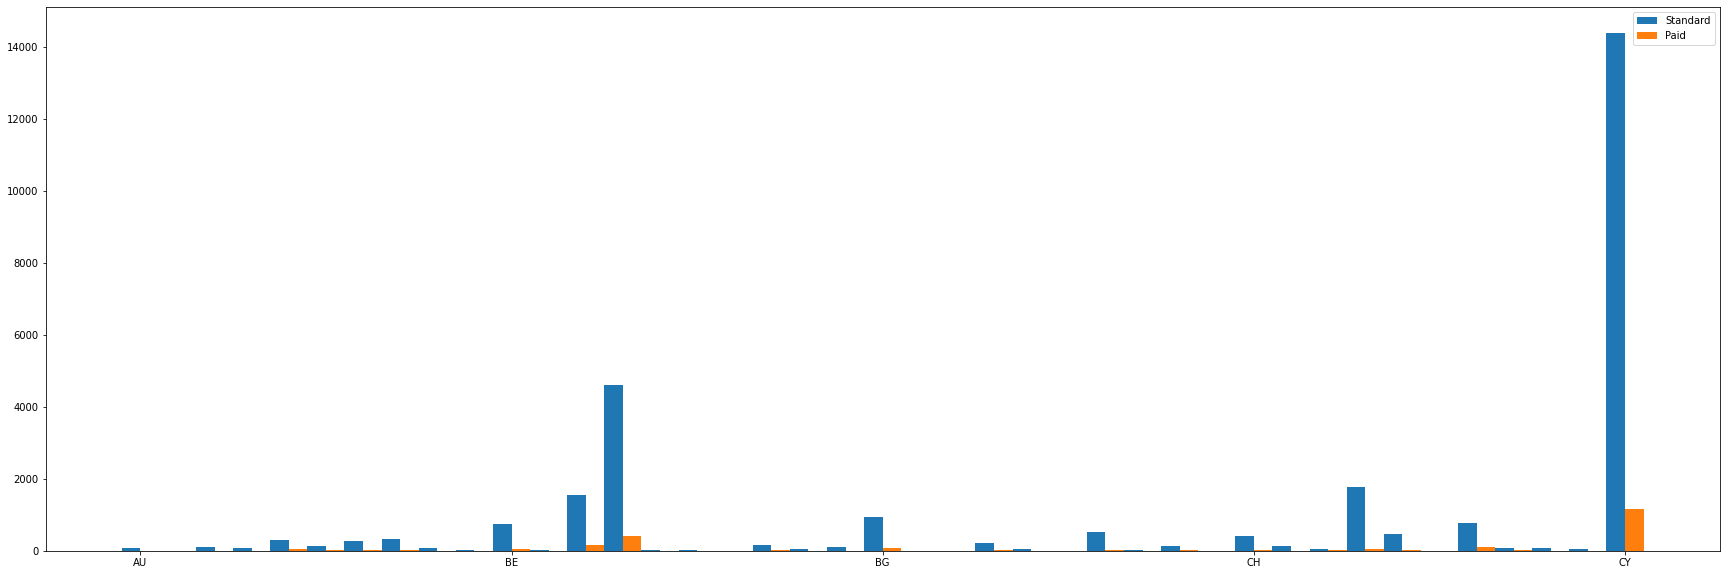

In [13]:
#Users subscribed per country
plot_pivot=users.pivot_table(values="birth_year",columns="grouped_plan",index="country",aggfunc="count",margins="grand total",\
                             fill_value=0)
plot_pivot=pd.DataFrame(plot_pivot.to_records())
#print(plot_pivot)
plt.figure(figsize=(20,5))

width=0.5
x = np.arange(len(plot_pivot['country']))
fig, ax = plt.subplots(1,1,figsize=(30,10))
rects1 = ax.bar(x - width/2, plot_pivot['0.0'], width, label='Standard')
rects2 = ax.bar(x + width/2, plot_pivot['1.0'], width, label='Paid')
ax.set_xticklabels(plot_pivot['country'])
ax.legend()

  Cluster   0.0  1.0
0  CEE_EU  3174  208
1    N_EU   929   69
2  Non_EU    18    5
3    S_EU  2179  141
4    W_EU  8094  727


<Figure size 1440x360 with 0 Axes>

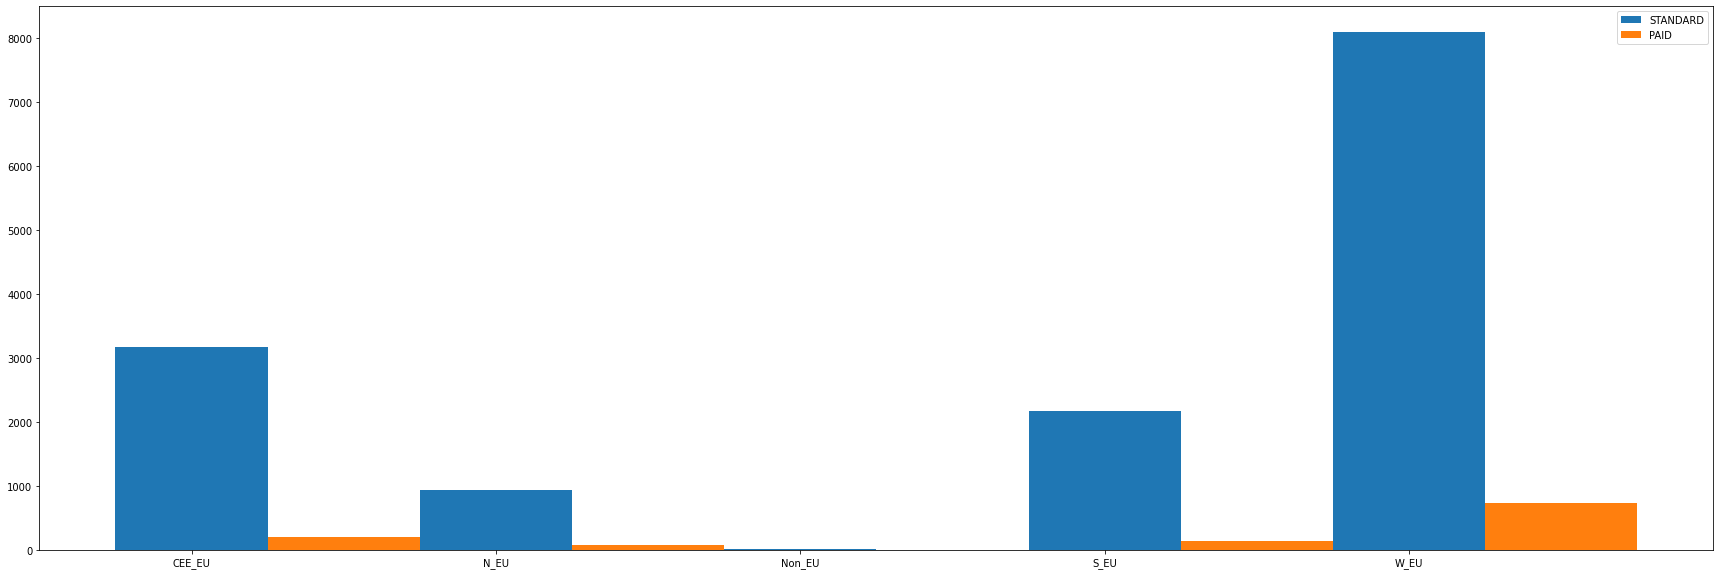

In [14]:
#Users subscribed per country cluster
plot_pivot=users.pivot_table(values="birth_year",columns="grouped_plan",index="Cluster",aggfunc="count",\
                             fill_value=0)
plot_pivot=pd.DataFrame(plot_pivot.to_records())
print(plot_pivot)

plt.figure(figsize=(20,5))

labels=plot_pivot['Cluster'].values.tolist()

width=0.5
x = np.arange(len(plot_pivot['Cluster']))
fig, ax = plt.subplots(1,1,figsize=(30,10))
rects1 = ax.bar(x - width/2, plot_pivot["0.0"], width, label='STANDARD',tick_label=labels)
rects2 = ax.bar(x + width/2, plot_pivot["1.0"], width, label='PAID')
ax.legend()

In [15]:
#Users subscribed per country cluster
plot_pivot=users.pivot_table(values="birth_year",columns="grouped_plan",index="age_group",aggfunc="count",\
                             fill_value=0)

plot_pivot

grouped_plan,0.0,1.0
age_group,,
Early Adult,7800,541
LowMid Adult,4603,423
UpMid Adult,1639,156
Pensioner,352,30


##Devices File

In [0]:
dev=dev1

In [17]:
test_pivot=dev.pivot_table(values="user_id",index="brand",aggfunc="count",margins="rows grand total")
print(dev.shape)
test_pivot

(15544, 2)


,user_id
brand,
Android,7800
Apple,7712
Unknown,32
All,15544


In [18]:
#Create Apple or not column
dev.loc[dev['brand']== "Apple", 'Brand_Apple'] = 1 
dev.loc[dev['brand']!= "Apple", 'Brand_Apple'] = 0
dev.tail() 

,brand,user_id,Brand_Apple
15539,Android,user_15539,0.0
15540,Apple,user_15540,1.0
15541,Android,user_15541,0.0
15542,Apple,user_15542,1.0
15543,Android,user_15543,0.0


###Plot *To Check and create more*

   Brand_Apple   0.0  1.0
0          0.0  7369  463
1          1.0  7025  687


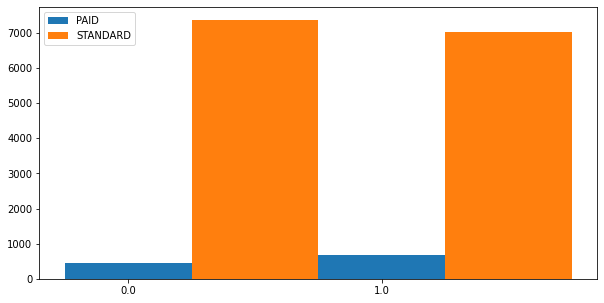

In [19]:
#Brand per subscription type
plot_merge=pd.merge(users,dev,how="left",on="user_id")
plot_pivot=plot_merge.pivot_table(values="user_id",index="Brand_Apple",columns="grouped_plan",aggfunc="count")
plot_pivot=pd.DataFrame(plot_pivot.to_records())
print(plot_pivot)

width=0.5
x = np.arange(len(plot_pivot['Brand_Apple']))
fig, ax = plt.subplots(1,1,figsize=(10,5))
rects1 = ax.bar(x - width/2, plot_pivot['1.0'], width, label='PAID',tick_label=plot_pivot['Brand_Apple'].values.tolist())
rects2 = ax.bar(x + width/2, plot_pivot['0.0'], width, label='STANDARD')
ax.set_xticklabels(plot_pivot['Brand_Apple'])
ax.legend()

##Notifications File

In [0]:
ntf=ntf_1

In [21]:
ntf.columns

Index(['reason', 'channel', 'status', 'user_id', 'created_date'], dtype='object')

In [22]:
colnames=ntf.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(ntf[cn])),"UniqueVal":len(ntf[cn].unique())},ignore_index=True)

df

,Column,NumOfMissingVal,UniqueVal
0,reason,0,17
1,channel,0,3
2,status,0,2
3,user_id,0,15156
4,created_date,0,97701


In [23]:
ntf['status'].value_counts()

SENT      71693
FAILED    26011
Name: status, dtype: int64

In [24]:
ntf['reason'].value_counts()

REENGAGEMENT_ACTIVE_FUNDS            28832
PROMO                                18987
NO_INITIAL_CARD_ORDER                 9071
NO_INITIAL_CARD_USE                   9035
INVEST_IN_GOLD                        6649
LOST_CARD_ORDER                       4941
PROMO_CARD_ORDER                      4358
JOINING_ANNIVERSARY                   3334
MADE_MONEY_REQUEST_NOT_SPLIT_BILL     2851
ONBOARDING_TIPS_ACTIVATED_USERS       2423
ENGAGEMENT_SPLIT_BILL_RESTAURANT      1834
BLACK_FRIDAY                          1681
METAL_RESERVE_PLAN                     950
SILVER_ENGAGEMENT_INACTIVE_CARD        896
WELCOME_BACK                           779
BLUE_TUESDAY                           555
SILVER_ENGAGEMENT_FEES_SAVED           528
Name: reason, dtype: int64

In [25]:
ntf_status=ntf.pivot_table(index="user_id",columns="status",values="channel",aggfunc="count",fill_value=0)
ntf_status.head()

status,FAILED,SENT
user_id,,
user_0,0,8
user_1,5,10
user_10,0,8
user_100,0,5
user_1000,0,1


In [26]:
ntf=ntf[ntf.status=="SENT"]
ntf.status.value_counts()

SENT    71693
Name: status, dtype: int64

In [27]:
ntf_reason_cluster=pd.DataFrame({"Useful_Ntf":[1,0,1,1,0,1,0,0,1,1,1,0,1,1,0,0,1],\
                                "reason":\
                                ['REENGAGEMENT_ACTIVE_FUNDS','PROMO','NO_INITIAL_CARD_ORDER','NO_INITIAL_CARD_USE',\
                                'INVEST_IN_GOLD','LOST_CARD_ORDER','PROMO_CARD_ORDER','JOINING_ANNIVERSARY',\
                                'MADE_MONEY_REQUEST_NOT_SPLIT_BILL','ONBOARDING_TIPS_ACTIVATED_USERS','ENGAGEMENT_SPLIT_BILL_RESTAURANT',\
                                'BLACK_FRIDAY','METAL_RESERVE_PLAN','SILVER_ENGAGEMENT_INACTIVE_CARD','WELCOME_BACK',\
                                'BLUE_TUESDAY','SILVER_ENGAGEMENT_FEES_SAVED']})
ntf_reason_cluster

ntf=pd.merge(ntf,ntf_reason_cluster,how="left",on="reason")
ntf.head()

,reason,channel,status,user_id,created_date,Useful_Ntf
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645,1
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_12783,2018-12-01 23:09:37.367127,1
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_10244,2018-12-04 02:57:56.425660,1
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_14486,2018-12-14 17:09:58.900808,1
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_28,2018-12-11 12:42:59.718574,1


In [28]:
ntf_reason_cluster=pd.DataFrame({"Mostly_paid_notif":[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1],\
                                "reason":\
                                ['REENGAGEMENT_ACTIVE_FUNDS','PROMO','NO_INITIAL_CARD_ORDER','NO_INITIAL_CARD_USE',\
                                'INVEST_IN_GOLD','LOST_CARD_ORDER','PROMO_CARD_ORDER','JOINING_ANNIVERSARY',\
                                'MADE_MONEY_REQUEST_NOT_SPLIT_BILL','ONBOARDING_TIPS_ACTIVATED_USERS','ENGAGEMENT_SPLIT_BILL_RESTAURANT',\
                                'BLACK_FRIDAY','METAL_RESERVE_PLAN','SILVER_ENGAGEMENT_INACTIVE_CARD','WELCOME_BACK',\
                                'BLUE_TUESDAY','SILVER_ENGAGEMENT_FEES_SAVED']})
ntf_reason_cluster

ntf=pd.merge(ntf,ntf_reason_cluster,how="left",on="reason")
ntf.head()

,reason,channel,status,user_id,created_date,Useful_Ntf,Mostly_paid_notif
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645,1,0
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_12783,2018-12-01 23:09:37.367127,1,0
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_10244,2018-12-04 02:57:56.425660,1,0
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_14486,2018-12-14 17:09:58.900808,1,0
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_28,2018-12-11 12:42:59.718574,1,0


In [29]:
ntf_channel=ntf.pivot_table(columns="channel",aggfunc="count",index="user_id",values="status",fill_value=0)
ntf_channel=pd.DataFrame(ntf_channel.to_records())
ntf_channel=ntf_channel.drop(columns=["SMS"])
ntf_channel

,user_id,EMAIL,PUSH
0,user_0,6,2
1,user_1,5,5
2,user_10,5,3
3,user_100,2,3
4,user_1000,1,0
...,...,...,...
14735,user_9995,1,0
14736,user_9996,1,0
14737,user_9997,2,5
14738,user_9998,2,1


In [30]:
ntf_reason = ntf.pivot_table(columns="Useful_Ntf",aggfunc="count",index="user_id",values="status",fill_value=0)
ntf_reason = pd.DataFrame(ntf_reason.to_records())
ntf_reason = ntf_reason.rename(columns={"0":"Marketing_ntf","1":"Useful_ntf"})
ntf_reason.head()

,user_id,Marketing_ntf,Useful_ntf
0,user_0,2,6
1,user_1,2,8
2,user_10,4,4
3,user_100,2,3
4,user_1000,0,1


In [31]:
ntf_reason2 = ntf.pivot_table(columns="Mostly_paid_notif",aggfunc="count",index="user_id",values="status",fill_value=0)
ntf_reason2 = pd.DataFrame(ntf_reason2.to_records())
ntf_reason2 = ntf_reason2.rename(columns={"0":"Other","1":"Mostly_paid_notif"})
ntf_reason2.head()

,user_id,Other,Mostly_paid_notif
0,user_0,8,0
1,user_1,10,0
2,user_10,8,0
3,user_100,5,0
4,user_1000,1,0


In [32]:
ntf_pivot=pd.merge(ntf_reason2,ntf_reason,on="user_id",how="outer")
ntf_pivot=pd.merge(ntf_pivot,ntf_status,on="user_id",how="outer")
ntf_pivot=pd.merge(ntf_pivot,ntf_channel,on="user_id",how="outer")

print("useful notif rows: ",ntf_reason.shape[0])
print("mostrly paid rows: ",ntf_reason2.shape[0])
print("status rows:       ",ntf_status.shape[0])
print("channel rows:      ",ntf_channel.shape[0])
print("total rows:        ",ntf_pivot.shape[0])

useful notif rows:  14740
mostrly paid rows:  14740
status rows:        15156
channel rows:       14740
total rows:         15156


##Transactions File

In [0]:
trans=tr1

###Unique/Missing Values

In [34]:
colnames=trans.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(trans[cn])),"UniqueVal":len(trans[cn].unique())},ignore_index=True)

df

,Column,NumOfMissingVal,UniqueVal
0,transaction_id,0,2181026
1,transactions_type,0,10
2,transactions_currency,0,35
3,amount_usd,0,43465
4,transactions_state,0,6
5,ea_cardholderpresence,933206,4
6,ea_merchant_mcc,923975,636
7,ea_merchant_city,924080,55474
8,ea_merchant_country,924239,197
9,direction,0,2


In [35]:
trans.columns

Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'amount_usd', 'transactions_state', 'ea_cardholderpresence',
       'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country',
       'direction', 'user_id', 'created_date'],
      dtype='object')

In [36]:
trans.transactions_state.value_counts()

COMPLETED    1916387
DECLINED      124226
REVERTED       89330
FAILED         32566
PENDING        17153
CANCELLED       1364
Name: transactions_state, dtype: int64

In [37]:
trans_status=trans.pivot_table(index="user_id",columns="transactions_state",values="amount_usd",aggfunc="count",fill_value=0)
trans_status.head()

transactions_state,CANCELLED,COMPLETED,DECLINED,FAILED,PENDING,REVERTED
user_id,,,,,,
user_0,0,520,6,9,2,8
user_1,0,133,6,1,0,6
user_10,0,123,16,0,1,3
user_100,0,55,4,4,0,3
user_1000,0,43,4,0,0,0


In [38]:
trans=trans[trans.transactions_state=="COMPLETED"]
trans.transactions_state.value_counts()
trans.amount_usd.describe()

count    1.916387e+06
mean     6.452131e+01
std      9.122444e+02
min      0.000000e+00
25%      2.400000e+00
50%      8.510000e+00
75%      2.809000e+01
max      6.127665e+05
Name: amount_usd, dtype: float64

###Clustering

In [39]:
#MCC clustering
trans.ea_merchant_mcc=trans.ea_merchant_mcc.fillna(11999)
 
trans['mcc_group'] = pd.cut(trans.ea_merchant_mcc, bins=[0,1000,1500,1800,2000,4000,5000,5200,6000,6800,9000,9730,10000,12000],\
                                  labels=['Agriculture','Mining','Construction',"not used","Manufacturing","Transportation","Wholesale",\
                                          "Retail","Finance","Services","Public_Admin","Nonclassifiable","Unknown"], right=False)
trans['mcc_group'].value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Unknown            846243
Retail             765151
Transportation     120941
Services            98282
Finance             63943
Manufacturing        8726
Public_Admin         5974
Wholesale            4268
Agriculture          1286
Mining               1101
Construction          472
Nonclassifiable         0
not used                0
Name: mcc_group, dtype: int64

In [0]:
#trans.mcc_group=trans.mcc_group.replace({'Agriculture':"Other",'Mining':"Other",'Construction':"Other",\
#                                                     "not used":"Other","Wholesale":"Retail","Public_Admin":"Other",\
#                                                     "Manufacturing":"Other","Finance":"Services"})
#print(trans.shape)
#trans['mcc_group'].value_counts()

In [41]:
trans.columns

Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'amount_usd', 'transactions_state', 'ea_cardholderpresence',
       'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country',
       'direction', 'user_id', 'created_date', 'mcc_group'],
      dtype='object')

In [42]:
trans_amount=trans.pivot_table(index="user_id",columns="direction",values="amount_usd",aggfunc=["max","mean","sum"])
trans_amount=pd.DataFrame(trans_amount.to_records())
trans_amount=trans_amount.rename(columns={"('max', 'INBOUND')":"max_amount_in","('max', 'OUTBOUND')":"max_amount_out",\
                          "('mean', 'INBOUND')":"mean_amount_in","('mean', 'OUTBOUND')":"mean_amount_out",\
                          "('sum', 'INBOUND')":"total_in","('sum', 'OUTBOUND')":"total_out"})
trans_amount.head()

,user_id,max_amount_in,max_amount_out,mean_amount_in,mean_amount_out,total_in,total_out
0,user_0,510.64,510.64,20.216748,10.167367,3295.33,3629.75
1,user_1,851.06,851.06,239.463333,61.226698,6465.51,6490.03
2,user_10,214.59,255.22,52.884808,37.871972,2750.01,2688.91
3,user_100,382.98,339.18,192.650909,47.975909,2119.16,2110.94
4,user_1000,238.31,158.87,18.660870,20.696000,429.20,413.92


In [0]:
#na dw diaforetika eidi sunallagwn kai ena count mono ton teleutaio mhna

#trans_count=trans.pivot_table(index="user_id",values="created_date",aggfunc=["max","count"])
#trans_count=pd.DataFrame(trans_count.to_records())

#trans_count.head()

In [44]:
trans["date_created"] = [dt.datetime.strptime(d,"%Y-%m-%d  %H:%M:%S.%f") for d in trans["created_date"]]
trans["year_created"] =trans["date_created"].dt.year
trans["month_created"] =trans["date_created"].dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [45]:
trans.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,mcc_group,date_created,year_created,month_created
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,11999.0,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487,Unknown,2018-04-03 03:34:21.784487,2018,4
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032,Transportation,2019-03-19 06:15:59.537032,2019,3
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032,Retail,2019-03-18 18:53:41.323032,2019,3
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,11999.0,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032,Unknown,2019-03-22 14:20:01.513032,2019,3
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652,Retail,2019-03-22 05:42:50.316652,2019,3


In [46]:
test=trans.pivot_table(values="user_id",index=["year_created","month_created"],aggfunc="count",fill_value="",margins="row grand total")
test

user_id
year_created month_created         
2018         1                 3662
             2                10052
             3                21503
             4                30378
             5                50507
             6                62453
             7                82694
             8               106053
             9               121264
             10              140387
             11              159424
             12              182900
2019         1               194250
             2               206895
             3               238883
             4               231585
             5                73497
All                         1916387

In [47]:
last_date_trans=max(trans.date_created)
trans["days_before"]=(last_date_trans-trans.date_created).dt.days
trans.loc[trans.days_before<= 30, "last_30d"] = 1
trans.loc[trans.days_before> 30, "last_30d"] = 0
trans_30d=trans.pivot_table(index="user_id",values="last_30d",aggfunc="sum",fill_value=0)
trans_30d=pd.DataFrame(trans_30d.to_records())
trans_30d.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,user_id,last_30d
0,user_0,50
1,user_1,23
2,user_10,14
3,user_100,0
4,user_1000,22


In [48]:
trans.loc[trans.month_created>= 3, "mar_to_may"] = 1
trans.loc[trans.year_created== 2019, "in_2019"] = 1
trans.mar_to_may=trans.mar_to_may.fillna(0)
trans.in_2019=trans.in_2019.fillna(0)
trans["last_3_mon"]=trans.in_2019*trans.mar_to_may
trans=trans.drop({"mar_to_may","in_2019"},axis=1)
trans.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,mcc_group,date_created,year_created,month_created,days_before,last_30d,last_3_mon
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,11999.0,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487,Unknown,2018-04-03 03:34:21.784487,2018,4,407,0.0,0.0
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032,Transportation,2019-03-19 06:15:59.537032,2019,3,57,0.0,1.0
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032,Retail,2019-03-18 18:53:41.323032,2019,3,58,0.0,1.0
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,11999.0,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032,Unknown,2019-03-22 14:20:01.513032,2019,3,54,0.0,1.0
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652,Retail,2019-03-22 05:42:50.316652,2019,3,54,0.0,1.0


In [49]:
trans_q4=trans.pivot_table(index="user_id",columns="last_3_mon",values="year_created",aggfunc="count",fill_value=0)
trans_q4=pd.DataFrame(trans_q4.to_records())
trans_q4=trans_q4.drop({"0.0"},axis=1)
trans_q4["trans_last_3m"]=trans_q4['1.0']
trans_q4.drop({"1.0"},axis=1,inplace=True)
trans_q4.head()

,user_id,trans_last_3m
0,user_0,99
1,user_1,41
2,user_10,23
3,user_100,0
4,user_1000,43


In [50]:
trans_type=trans.pivot_table(index="user_id",columns="transactions_type",values="amount_usd",aggfunc="sum",fill_value=0)
trans_type=pd.DataFrame(trans_type.to_records())
trans_type.drop(columns="TRANSFER",inplace=True)
trans_type2=trans[trans.transactions_type=="TRANSFER"].pivot_table(index="user_id",columns="direction",values="amount_usd",aggfunc="sum",fill_value=0)
trans_type2=pd.DataFrame(trans_type2.to_records())
trans_type2.rename(columns={"INBOUND":"TRANSFER_in","OUTBOUND":"TRANSFER_out"},inplace=True)
trans_type=pd.merge(trans_type,trans_type2,on="user_id",how="outer")
trans_type=trans_type.fillna(0)
trans_type.head()

,user_id,ATM,CARD_PAYMENT,CARD_REFUND,CASHBACK,EXCHANGE,FEE,REFUND,TAX,TOPUP,TRANSFER_in,TRANSFER_out
0,user_0,0.00,2199.93,13.00,0.00,183.20,0.00,0.0,0.0,3226.37,55.96,1246.62
1,user_1,1183.02,2441.48,0.00,0.00,0.00,0.00,0.0,0.0,6204.23,261.28,2865.53
2,user_10,408.51,1476.11,485.96,0.00,1.22,0.00,0.0,0.0,2264.05,0.00,803.07
3,user_100,425.66,1685.28,0.00,0.00,0.00,0.00,0.0,0.0,2119.16,0.00,0.00
4,user_1000,158.87,232.73,0.00,0.24,0.00,22.24,0.0,0.0,428.96,0.00,0.08


In [51]:
trans_pivot=pd.merge(trans_status,trans_type,on="user_id",how="outer")
trans_pivot=pd.merge(trans_pivot,trans_amount,on="user_id",how="outer")
trans_pivot=pd.merge(trans_pivot,trans_q4,on="user_id",how="outer")
print("status rows",trans_status.shape[0])
print("type rows",trans_type.shape[0])
print("amount rows",trans_amount.shape[0])
print("trans Q4 rows: ",trans_q4.shape[0])
print("total rows: ",trans_pivot.shape[0])

status rows 15012
type rows 14821
amount rows 14821
trans Q4 rows:  14821
total rows:  15012


##Final User file

In [52]:
users.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals', 'user_age', 'date_created',
       'subscription_days', 'grouped_plan', 'Cluster', 'GDP_per_capita',
       'age_group'],
      dtype='object')

In [53]:
us_clas=pd.merge(users,dev,on="user_id",how="outer",)
us_clas=pd.merge(us_clas,ntf_pivot,on="user_id",how="outer")
us_clas=pd.merge(us_clas,trans_pivot,on="user_id",how="outer")
us_clas=pd.merge(us_clas,trans_30d,on="user_id",how="outer")
us_clas.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals', 'user_age', 'date_created',
       'subscription_days', 'grouped_plan', 'Cluster', 'GDP_per_capita',
       'age_group', 'brand', 'Brand_Apple', 'Other', 'Mostly_paid_notif',
       'Marketing_ntf', 'Useful_ntf', 'FAILED_x', 'SENT', 'EMAIL', 'PUSH',
       'CANCELLED', 'COMPLETED', 'DECLINED', 'FAILED_y', 'PENDING', 'REVERTED',
       'ATM', 'CARD_PAYMENT', 'CARD_REFUND', 'CASHBACK', 'EXCHANGE', 'FEE',
       'REFUND', 'TAX', 'TOPUP', 'TRANSFER_in', 'TRANSFER_out',
       'max_amount_in', 'max_amount_out', 'mean_amount_in', 'mean_amount_out',
       'total_in', 'total_out', 'trans_last_3m', 'last_30d'],
      dtype='object')

In [0]:
us_clas.to_csv("total_users.csv")

In [0]:
#users.age_group = users.age_group.replace("Early Adult", 1)
#users.age_group = users.age_group.replace("LowMid Adult", 2)
#users.age_group = users.age_group.replace("UpMid Adult", 3)
#users.age_group = users.age_group.replace("Pensioner", 4)
#users=pd.get_dummies(users,columns=["age_group"])

In [0]:
#us_clas=us_clas.rename(columns={"grouped_plan":"paid"})

In [0]:
#users.to_csv("/content/drive/My Drive/Project Future/Project/to_user_mod.csv")
#users=users.drop(columns=["user_id","GDP_per_capita","birth_year","country","user_age","Full_Country"])
#users.columns

In [0]:
#print(users.Cluster.unique())
#users.Cluster.value_counts()
#users=pd.get_dummies(users,columns=["Cluster"])
#users.head()

In [0]:
#users=pd.get_dummies(users,columns=["GDP_per_capita"])
#users.head()

In [60]:
us_clas.dtypes

user_id                                             object
birth_year                                           int64
country                                             object
city                                                object
created_date                                        object
user_settings_crypto_unlocked                        int64
attributes_notifications_marketing_push            float64
attributes_notifications_marketing_email           float64
num_contacts                                         int64
num_referrals                                        int64
num_successful_referrals                             int64
user_age                                             int64
date_created                                datetime64[ns]
subscription_days                                    int64
grouped_plan                                       float64
Cluster                                             object
GDP_per_capita                                      obje

In [61]:
colnames=us_clas.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(us_clas[cn])),"UniqueVal":len(us_clas[cn].unique())},ignore_index=True)

df

,Column,NumOfMissingVal,UniqueVal
0,user_id,0,15544
1,birth_year,0,69
2,country,0,40
3,city,0,5197
4,created_date,0,15544
5,user_settings_crypto_unlocked,0,2
6,attributes_notifications_marketing_push,5260,3
7,attributes_notifications_marketing_email,5260,3
8,num_contacts,0,283
9,num_referrals,0,1


In [0]:
#us_clas=us_clas.fillna(0)

In [63]:
'''
colnames=us_clas.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(us_clas[cn])),"UniqueVal":len(us_clas[cn].unique())},ignore_index=True)

df
'''

'\ncolnames=us_clas.columns\ndf=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])\nfor cn in colnames:\n  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(us_clas[cn])),"UniqueVal":len(us_clas[cn].unique())},ignore_index=True)\n\ndf\n'

In [64]:
us_clas.describe()

,birth_year,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,user_age,subscription_days,grouped_plan,Brand_Apple,Other,Mostly_paid_notif,Marketing_ntf,Useful_ntf,FAILED_x,SENT,EMAIL,PUSH,CANCELLED,COMPLETED,DECLINED,FAILED_y,PENDING,REVERTED,ATM,CARD_PAYMENT,CARD_REFUND,CASHBACK,EXCHANGE,FEE,REFUND,TAX,TOPUP,TRANSFER_in,TRANSFER_out,max_amount_in,max_amount_out,mean_amount_in,mean_amount_out,total_in,total_out,trans_last_3m,last_30d
count,15544.000000,15544.000000,10284.000000,10284.000000,15544.000000,15544.0,15544.0,15544.000000,15544.000000,15544.000000,15544.000000,14740.000000,14740.000000,14740.000000,14740.000000,15156.000000,15156.000000,14740.000000,14740.000000,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000,14821.000000,14821.000000,14821.000000,14821.000000,1.482100e+04,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,14624.000000,14197.000000,14624.000000,14197.000000,14624.000000,1.419700e+04,14821.000000,14821.000000
mean,1983.666624,0.182385,0.948269,0.895469,17.874228,0.0,0.0,36.333376,685.650733,0.073984,0.496140,4.781615,0.082225,1.898915,2.964925,1.716218,4.730338,2.351153,2.460516,0.090861,127.657008,8.275113,2.169331,1.142619,5.950573,293.221721,1376.627626,40.386541,0.375265,1.628564e+03,10.290986,32.215083,0.015126,3117.630644,139.831518,1703.584486,802.860096,741.463610,186.813376,80.512960,3375.303418,5.232610e+03,36.702314,13.258889
std,11.369184,0.386174,0.221494,0.305963,47.549929,0.0,0.0,11.369184,104.708764,0.261753,0.500001,2.604542,0.452983,1.284841,2.237097,4.362390,2.757586,1.591424,2.144328,0.393477,222.903678,20.178412,7.606309,3.044161,9.214096,884.523795,2879.392424,632.875899,5.564296,2.792114e+04,26.463754,1729.865555,0.147645,11825.340798,877.349541,11263.091498,6067.584916,6173.155371,858.115749,647.498367,12594.000974,3.485863e+04,73.972399,28.000204
min,1929.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,19.000000,522.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,1.000000e-02,0.000000,0.000000
25%,1977.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,28.000000,594.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.030000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,127.660000,0.000000,0.000000,85.110000,66.140000,28.771204,11.702500,194.040000,2.737100e+02,0.000000,0.000000
50%,1986.000000,0.000000,1.000000,1.000000,5.000000,0.0,0.0,34.000000,676.000000,0.000000,0.000000,4.000000,0.000000,2.000000,3.000000,1.000000,4.000000,2.000000,2.000000,0.000000,49.000000,3.000000,0.000000,0.000000,3.000000,19.530000,424.950000,0.000000,0.000000,0.000000e+00,1.990000,0.000000,0.000000,829.140000,0.000000,61.280000,250.000000,198.830000,73.407917,24.588953,968.140000,1.310450e+03,9.000000,2.000000
75%,1992.000000,0.000000,1.000000,1.000000,19.000000,0.0,0.0,43.000000,772.000000,0.000000,1.000000,6.000000,0.000000,3.000000,4.000000,2.000000,6.000000,3.000000,4.000000,0.000000,141.000000,9.000000,2.000000,1.000000,7.000000,257.800000,1561.650000,0.000000,0.000000,5.115500e+02,5.100000,0.000000,0.000000,2756.860000,20.000000,634.390000,556.730000,500.000000,157.110714,50.501765,3017.680000,4.072610e+03,39.000000,14.000000
max,2001.000000,1.000000,1.000000,1.000000,2918.000000,0.0,0.0,91.000000,889.000000,1.000000,1.000000,20.000000,7.000000,7.000000,17.000000,283.000000,20.000000,10.000000,16.000000,7.000000,2995.000000,903.000000,418.000000,84.000000,226.000000,31591.450000,81092.070000,52843.930000,431.520000,3.110483e+06,343.300000,166335.710000,7.

In [65]:
us_clas.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals', 'user_age', 'date_created',
       'subscription_days', 'grouped_plan', 'Cluster', 'GDP_per_capita',
       'age_group', 'brand', 'Brand_Apple', 'Other', 'Mostly_paid_notif',
       'Marketing_ntf', 'Useful_ntf', 'FAILED_x', 'SENT', 'EMAIL', 'PUSH',
       'CANCELLED', 'COMPLETED', 'DECLINED', 'FAILED_y', 'PENDING', 'REVERTED',
       'ATM', 'CARD_PAYMENT', 'CARD_REFUND', 'CASHBACK', 'EXCHANGE', 'FEE',
       'REFUND', 'TAX', 'TOPUP', 'TRANSFER_in', 'TRANSFER_out',
       'max_amount_in', 'max_amount_out', 'mean_amount_in', 'mean_amount_out',
       'total_in', 'total_out', 'trans_last_3m', 'last_30d'],
      dtype='object')

In [66]:
us_clas.drop(columns=["birth_year",'country', 'city', 'created_date','num_referrals', 'num_successful_referrals','date_created','brand','Other',\
                      "attributes_notifications_marketing_push","attributes_notifications_marketing_email"],inplace=True)
us_clas.columns

Index(['user_id', 'user_settings_crypto_unlocked', 'num_contacts', 'user_age',
       'subscription_days', 'grouped_plan', 'Cluster', 'GDP_per_capita',
       'age_group', 'Brand_Apple', 'Mostly_paid_notif', 'Marketing_ntf',
       'Useful_ntf', 'FAILED_x', 'SENT', 'EMAIL', 'PUSH', 'CANCELLED',
       'COMPLETED', 'DECLINED', 'FAILED_y', 'PENDING', 'REVERTED', 'ATM',
       'CARD_PAYMENT', 'CARD_REFUND', 'CASHBACK', 'EXCHANGE', 'FEE', 'REFUND',
       'TAX', 'TOPUP', 'TRANSFER_in', 'TRANSFER_out', 'max_amount_in',
       'max_amount_out', 'mean_amount_in', 'mean_amount_out', 'total_in',
       'total_out', 'trans_last_3m', 'last_30d'],
      dtype='object')

In [67]:
colnames=us_clas.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(us_clas[cn])),"UniqueVal":len(us_clas[cn].unique())},ignore_index=True)

df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
Column,user_id,user_settings_crypto_unlocked,num_contacts,user_age,subscription_days,grouped_plan,Cluster,GDP_per_capita,age_group,Brand_Apple,Mostly_paid_notif,Marketing_ntf,Useful_ntf,FAILED_x,SENT,EMAIL,PUSH,CANCELLED,COMPLETED,DECLINED,FAILED_y,PENDING,REVERTED,ATM,CARD_PAYMENT,CARD_REFUND,CASHBACK,EXCHANGE,FEE,REFUND,TAX,TOPUP,TRANSFER_in,TRANSFER_out,max_amount_in,max_amount_out,mean_amount_in,mean_amount_out,total_in,total_out,trans_last_3m,last_30d
NumOfMissingVal,0,0,0,0,0,0,0,0,0,0,804,804,804,388,388,804,804,532,532,532,532,532,532,723,723,723,723,723,723,723,723,723,723,723,920,1347,920,1347,920,1347,723,723
UniqueVal,15544,2,283,69,368,2,5,3,4,2,9,9,17,53,20,12,16,9,1014,152,78,42,99,6324,11695,2545,447,6513,1027,403,34,9844,3547,8407,2757,7794,11638,13323,11010,13227,456,223


In [0]:
#testara = us_clas[(pd.isnull(us_clas['total_out']))|(pd.isnull(us_clas['total_in']))]
#testara.shape

In [69]:
'''
colnames=testara.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(testara[cn])),"UniqueVal":len(testara[cn].unique())},ignore_index=True)

df.T
'''

'\ncolnames=testara.columns\ndf=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])\nfor cn in colnames:\n  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(testara[cn])),"UniqueVal":len(testara[cn].unique())},ignore_index=True)\n\ndf.T\n'

In [0]:
#us_clas.grouped_plan.value_counts()

In [0]:
#testara.grouped_plan.value_counts()

In [72]:
#Fill NaNs

#Notification type
us_clas.Mostly_paid_notif.fillna(0,inplace=True)
us_clas.Marketing_ntf.fillna(0,inplace=True)
us_clas.Useful_ntf.fillna(0,inplace=True)
#Notification Status
us_clas.FAILED_x.fillna(0,inplace=True)
us_clas.SENT.fillna(0,inplace=True)
#Notification channel
us_clas.EMAIL.fillna(0,inplace=True)
us_clas.PUSH.fillna(0,inplace=True)
'''
#Transaction status
us_clas.CANCELLED.fillna(0,inplace=True)
us_clas.COMPLETED.fillna(0,inplace=True)
us_clas.DECLINED.fillna(0,inplace=True)
us_clas.FAILED_y.fillna(0,inplace=True)
us_clas.PENDING.fillna(0,inplace=True)
us_clas.REVERTED.fillna(0,inplace=True)
#Transaction type
us_clas.ATM.fillna(0,inplace=True)
us_clas.CARD_PAYMENT.fillna(0,inplace=True)
us_clas.CARD_REFUND.fillna(0,inplace=True)
us_clas.CASHBACK.fillna(0,inplace=True)
us_clas.EXCHANGE.fillna(0,inplace=True)
us_clas.FEE.fillna(0,inplace=True)
us_clas.REFUND.fillna(0,inplace=True)
us_clas.TAX.fillna(0,inplace=True)
us_clas.TOPUP.fillna(0,inplace=True)
us_clas.TRANSFER.fillna(0,inplace=True)
#Transaction amount
us_clas.max_amount_in.fillna(0,inplace=True)
us_clas.max_amount_out.fillna(0,inplace=True)
us_clas.mean_amount_in.fillna(0,inplace=True)
us_clas.mean_amount_out.fillna(0,inplace=True)
us_clas.total_in.fillna(0,inplace=True)
us_clas.total_out.fillna(0,inplace=True)
#Transaction last months
us_clas.trans_last_3m.fillna(0,inplace=True)
'''

'\n#Transaction status\nus_clas.CANCELLED.fillna(0,inplace=True)\nus_clas.COMPLETED.fillna(0,inplace=True)\nus_clas.DECLINED.fillna(0,inplace=True)\nus_clas.FAILED_y.fillna(0,inplace=True)\nus_clas.PENDING.fillna(0,inplace=True)\nus_clas.REVERTED.fillna(0,inplace=True)\n#Transaction type\nus_clas.ATM.fillna(0,inplace=True)\nus_clas.CARD_PAYMENT.fillna(0,inplace=True)\nus_clas.CARD_REFUND.fillna(0,inplace=True)\nus_clas.CASHBACK.fillna(0,inplace=True)\nus_clas.EXCHANGE.fillna(0,inplace=True)\nus_clas.FEE.fillna(0,inplace=True)\nus_clas.REFUND.fillna(0,inplace=True)\nus_clas.TAX.fillna(0,inplace=True)\nus_clas.TOPUP.fillna(0,inplace=True)\nus_clas.TRANSFER.fillna(0,inplace=True)\n#Transaction amount\nus_clas.max_amount_in.fillna(0,inplace=True)\nus_clas.max_amount_out.fillna(0,inplace=True)\nus_clas.mean_amount_in.fillna(0,inplace=True)\nus_clas.mean_amount_out.fillna(0,inplace=True)\nus_clas.total_in.fillna(0,inplace=True)\nus_clas.total_out.fillna(0,inplace=True)\n#Transaction last mon

In [73]:
#Drop NaN transactions
us_clas=us_clas.dropna(subset=['total_in', 'total_out'])
colnames=us_clas.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(us_clas[cn])),"UniqueVal":len(us_clas[cn].unique())},ignore_index=True)

df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
Column,user_id,user_settings_crypto_unlocked,num_contacts,user_age,subscription_days,grouped_plan,Cluster,GDP_per_capita,age_group,Brand_Apple,Mostly_paid_notif,Marketing_ntf,Useful_ntf,FAILED_x,SENT,EMAIL,PUSH,CANCELLED,COMPLETED,DECLINED,FAILED_y,PENDING,REVERTED,ATM,CARD_PAYMENT,CARD_REFUND,CASHBACK,EXCHANGE,FEE,REFUND,TAX,TOPUP,TRANSFER_in,TRANSFER_out,max_amount_in,max_amount_out,mean_amount_in,mean_amount_out,total_in,total_out,trans_last_3m,last_30d
NumOfMissingVal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UniqueVal,14000,2,281,69,368,2,5,3,4,2,8,8,16,52,19,11,15,8,1011,151,77,41,98,6316,11647,2544,446,6496,1024,402,33,9813,3537,8363,2726,7753,11586,13212,10961,13119,455,222


In [74]:
colnames=us_clas.columns
print(us_clas.shape)
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(us_clas[cn])),"UniqueVal":len(us_clas[cn].unique())},ignore_index=True)

df.T

(14000, 42)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
Column,user_id,user_settings_crypto_unlocked,num_contacts,user_age,subscription_days,grouped_plan,Cluster,GDP_per_capita,age_group,Brand_Apple,Mostly_paid_notif,Marketing_ntf,Useful_ntf,FAILED_x,SENT,EMAIL,PUSH,CANCELLED,COMPLETED,DECLINED,FAILED_y,PENDING,REVERTED,ATM,CARD_PAYMENT,CARD_REFUND,CASHBACK,EXCHANGE,FEE,REFUND,TAX,TOPUP,TRANSFER_in,TRANSFER_out,max_amount_in,max_amount_out,mean_amount_in,mean_amount_out,total_in,total_out,trans_last_3m,last_30d
NumOfMissingVal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UniqueVal,14000,2,281,69,368,2,5,3,4,2,8,8,16,52,19,11,15,8,1011,151,77,41,98,6316,11647,2544,446,6496,1024,402,33,9813,3537,8363,2726,7753,11586,13212,10961,13119,455,222


In [0]:
us_clas.to_csv("/content/drive/My Drive/Project Future/Project/Classification Test/train_clas.csv",index=False)

#Classificator training

In [76]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,classification_report
print("Loaded")

Loaded


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


##Labels/features split

In [77]:
us_clas_train=us_clas
us_clas_train.columns

Index(['user_id', 'user_settings_crypto_unlocked', 'num_contacts', 'user_age',
       'subscription_days', 'grouped_plan', 'Cluster', 'GDP_per_capita',
       'age_group', 'Brand_Apple', 'Mostly_paid_notif', 'Marketing_ntf',
       'Useful_ntf', 'FAILED_x', 'SENT', 'EMAIL', 'PUSH', 'CANCELLED',
       'COMPLETED', 'DECLINED', 'FAILED_y', 'PENDING', 'REVERTED', 'ATM',
       'CARD_PAYMENT', 'CARD_REFUND', 'CASHBACK', 'EXCHANGE', 'FEE', 'REFUND',
       'TAX', 'TOPUP', 'TRANSFER_in', 'TRANSFER_out', 'max_amount_in',
       'max_amount_out', 'mean_amount_in', 'mean_amount_out', 'total_in',
       'total_out', 'trans_last_3m', 'last_30d'],
      dtype='object')

In [78]:
us_clas_train.rename(columns={"user_settings_crypto_unlocked":"crypto_unlocked","grouped_plan":"paid","Cluster":"country_cluster",\
                        "FAILED_x":"FAILED_ntf","SENT":"SENT_ntf",'CANCELLED':"CANCELLED_trs",'COMPLETED':"COMPLETED_trs", 'DECLINED':"DECLINED_trs",\
                        'FAILED_y':"FAILED_trs", 'PENDING':"PENDING_trs", 'REVERTED':"REVERTED_trs", 'ATM':"ATM_type",'CARD_PAYMENT':"CARD_PAYMENT_type",\
                        'CARD_REFUND':"CARD_REFUND_type", 'CASHBACK':"CASHBACK_type", 'EXCHANGE':"EXCHANGE_type", 'FEE':"FEE_type", 'REFUND':"REFUND_type",\
                        'TAX':"TAX_type", 'TOPUP':"TOPUP_type", 'TRANSFER':"TRANSFER_type"},inplace=True)
us_clas_train.drop(columns=['Mostly_paid_notif', 'CASHBACK_type','FEE_type'],inplace=True)
us_clas_train.columns

Index(['user_id', 'crypto_unlocked', 'num_contacts', 'user_age',
       'subscription_days', 'paid', 'country_cluster', 'GDP_per_capita',
       'age_group', 'Brand_Apple', 'Marketing_ntf', 'Useful_ntf', 'FAILED_ntf',
       'SENT_ntf', 'EMAIL', 'PUSH', 'CANCELLED_trs', 'COMPLETED_trs',
       'DECLINED_trs', 'FAILED_trs', 'PENDING_trs', 'REVERTED_trs', 'ATM_type',
       'CARD_PAYMENT_type', 'CARD_REFUND_type', 'EXCHANGE_type', 'REFUND_type',
       'TAX_type', 'TOPUP_type', 'TRANSFER_in', 'TRANSFER_out',
       'max_amount_in', 'max_amount_out', 'mean_amount_in', 'mean_amount_out',
       'total_in', 'total_out', 'trans_last_3m', 'last_30d'],
      dtype='object')

In [79]:
print(us_clas_train.shape)
drop_col_clas=[]

test=us_clas_train.drop(columns=drop_col_clas)

test=pd.get_dummies(test,columns=["age_group"])
test=pd.get_dummies(test,columns=["GDP_per_capita"])
test=pd.get_dummies(test,columns=["country_cluster"])

print(test.shape)
test.columns

(14000, 39)
(14000, 48)


Index(['user_id', 'crypto_unlocked', 'num_contacts', 'user_age',
       'subscription_days', 'paid', 'Brand_Apple', 'Marketing_ntf',
       'Useful_ntf', 'FAILED_ntf', 'SENT_ntf', 'EMAIL', 'PUSH',
       'CANCELLED_trs', 'COMPLETED_trs', 'DECLINED_trs', 'FAILED_trs',
       'PENDING_trs', 'REVERTED_trs', 'ATM_type', 'CARD_PAYMENT_type',
       'CARD_REFUND_type', 'EXCHANGE_type', 'REFUND_type', 'TAX_type',
       'TOPUP_type', 'TRANSFER_in', 'TRANSFER_out', 'max_amount_in',
       'max_amount_out', 'mean_amount_in', 'mean_amount_out', 'total_in',
       'total_out', 'trans_last_3m', 'last_30d', 'age_group_Early Adult',
       'age_group_LowMid Adult', 'age_group_UpMid Adult',
       'age_group_Pensioner', 'GDP_per_capita_30k_45k', 'GDP_per_capita_<30k',
       'GDP_per_capita_>45k', 'country_cluster_CEE_EU', 'country_cluster_N_EU',
       'country_cluster_Non_EU', 'country_cluster_S_EU',
       'country_cluster_W_EU'],
      dtype='object')

In [80]:
X=test.drop(columns=["user_id","paid"]).to_numpy()
y=test.paid.to_numpy()
print(np.shape(X))
print(np.shape(y))

(14000, 46)
(14000,)


##Train Test split and Oversampling

In [81]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("Full data size:")
print(test.drop(columns="paid").shape,test.paid.shape)
print("Training data size:")
print(np.shape(X_train),np.shape(y_train))
print("Testing data size:")
print(np.shape(X_test),np.shape(y_test),"\n")

print(Counter(y_train))
sm=SMOTE(random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)

print(Counter(y_train))

Full data size:
(14000, 47) (14000,)
Training data size:
(9800, 46) (9800,)
Testing data size:
(4200, 46) (4200,) 

Counter({0.0: 8994, 1.0: 806})
Counter({0.0: 8994, 1.0: 8994})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##Classificator

In [82]:
rfc=RandomForestClassifier(random_state=42)
scl=StandardScaler()
var=VarianceThreshold()

pipe = Pipeline([('scl',scl),('var',var),('rfc',rfc)])
grid={"rfc__n_estimators":[10,500,1000]}

gs=GridSearchCV(pipe,grid,cv=5)

gs.fit(X_train,y_train)
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('var', VarianceThreshold(threshold=0.0)),
                ('rfc',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=

In [83]:
y_pred=gs.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      3860
         1.0       0.72      0.44      0.55       340

    accuracy                           0.94      4200
   macro avg       0.84      0.71      0.76      4200
weighted avg       0.93      0.94      0.93      4200



In [84]:
tester=pd.DataFrame({"lll":y_test})
tester.lll.value_counts()

0.0    3860
1.0     340
Name: lll, dtype: int64

In [85]:
tester2=pd.DataFrame({"lll":y_pred})
tester.lll.value_counts()

0.0    3860
1.0     340
Name: lll, dtype: int64

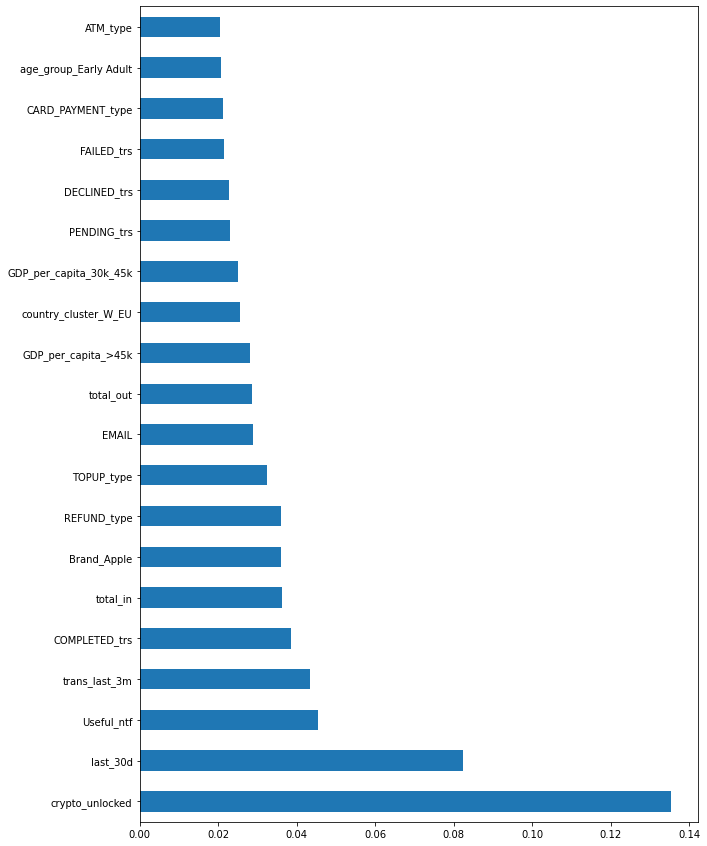

In [86]:
feat_importances = pd.Series(gs.best_estimator_[2].feature_importances_, index=test.drop(columns=["user_id","paid"]).columns)
ax=plt.figure(figsize=(10,15))
feat_importances.nlargest(20).plot(kind='barh')

#Use set

In [0]:
#Load Test Data
dev2=pd.read_csv('/content/drive/My Drive/Project Future/Project/test/devices_test.csv')
ntf_2=pd.read_csv('/content/drive/My Drive/Project Future/Project/test/notifications_test.csv')
tr2=pd.read_csv('/content/drive/My Drive/Project Future/Project/test/transactions_test.csv')
us2=pd.read_csv('/content/drive/My Drive/Project Future/Project/test/users_test.csv')

##Users File

###**Unique Values**

In [88]:
users=us2
colnames=users.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(users[cn])),"UniqueVal":len(users[cn].unique())},ignore_index=True)

df

,Column,NumOfMissingVal,UniqueVal
0,user_id,0,3886
1,birth_year,0,62
2,country,0,39
3,city,0,1838
4,created_date,0,3886
5,user_settings_crypto_unlocked,0,2
6,attributes_notifications_marketing_push,1350,3
7,attributes_notifications_marketing_email,1350,3
8,num_contacts,0,186
9,num_referrals,0,1


In [0]:
#Drop unnecessary columns
#print(users.shape)
#users=users.drop(labels={"num_successful_referrals","num_referrals","city","created_date","attributes_notifications_marketing_email","attributes_notifications_marketing_push"},axis=1)
#print(users.shape)
#users.columns

In [90]:
users.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals'],
      dtype='object')

In [91]:
colnames=users.columns
for cn in colnames[1:3].append(colnames[5:9].append(colnames[10:12])):
  print(cn,"\n" , users[cn].unique(),"\n")

birth_year 
 [1987 1981 1980 1995 1996 1986 1989 1991 1985 1984 1992 1966 1982 1973
 1969 1998 1988 1971 1993 1975 1990 1978 1952 1997 1967 1979 1950 1940
 1963 1957 1976 1974 1994 1983 1954 1972 1964 1999 1977 1970 1959 1965
 1961 1953 1962 1968 1958 1951 1955 1949 2000 1944 1960 1947 1956 1948
 1934 2001 1942 1946 1939 1937] 

country 
 ['PL' 'GB' 'FR' 'LT' 'DK' 'RO' 'ES' 'MT' 'IE' 'CH' 'LU' 'GR' 'NL' 'NO'
 'HU' 'SI' 'LV' 'DE' 'PT' 'IT' 'BE' 'HR' 'CZ' 'CY' 'BG' 'SE' 'SK' 'GI'
 'AU' 'GF' 'JE' 'IM' 'AT' 'IS' 'FI' 'GP' 'EE' 'MQ' 'GG'] 

user_settings_crypto_unlocked 
 [0 1] 

attributes_notifications_marketing_push 
 [ 0. nan  1.] 

attributes_notifications_marketing_email 
 [ 0. nan  1.] 

num_contacts 
 [ 21   0  38  10   5   7  52  22  48   9   2  15 668  34  12  14  16   4
  19  11   3   1  29  36  18  44   8  26  56  27  55  43   6  39  41  63
 122  47  31  68  42 114  17  25  23  70 180  24  13  94  20  28 159  54
  49  32  46  33  50 177  37  69 154  35  83 117  73 158  59  86  5

In [92]:
#Ypologismos Hlikias users
users["user_age"] =  dt.date.today().year-users['birth_year']

#Calculation of days subscribed
users["date_created"] = [dt.datetime.strptime(d,"%Y-%m-%d  %H:%M:%S.%f") for d in users["created_date"]]
users["subscription_days"] = (dt.datetime.today()- users.date_created).dt.days

users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,user_age,date_created,subscription_days
0,user_2,1987,PL,Poznań,2018-01-18 19:17:31.229096,0,0.0,0.0,21,0,0,33,2018-01-18 19:17:31.229096,871
1,user_8,1981,GB,Fife,2018-01-03 07:28:59.063740,1,NaN,NaN,0,0,0,39,2018-01-03 07:28:59.063740,887
2,user_10,1980,FR,Paris,2018-01-04 08:05:15.466282,0,1.0,1.0,38,0,0,40,2018-01-04 08:05:15.466282,886
3,user_13,1995,LT,Anykščiai,2018-01-28 16:56:16.221271,0,1.0,1.0,10,0,0,25,2018-01-28 16:56:16.221271,862
4,user_17,1996,GB,Birmingham,2018-01-08 04:18:47.595266,1,NaN,NaN,0,0,0,24,2018-01-08 04:18:47.595266,882


###Clustering

In [93]:
#Countries clustering
countries_cluster=pd.DataFrame({"Cluster":["CEE_EU"]*8+["N_EU"]*8+["S_EU"]*7+["W_EU"]*13+["Non_EU"]*4,"country":\
                                ['BG','RO','PL','CZ','SI','HU','HR','SK',\
                                'LT','DK','EE','FI','IS','LV','NO','SE',\
                                'ES','MT','CY','GR','IT','GI','PT',\
                                'AT','IE','GB','BE','CH','DE','GG','IM','JE','LI','LU','NL',"FR",\
                                'AU','GP','MQ','RE']})
countries_cluster

users=pd.merge(users,countries_cluster,how="left",on="country")
users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,user_age,date_created,subscription_days,Cluster
0,user_2,1987,PL,Poznań,2018-01-18 19:17:31.229096,0,0.0,0.0,21,0,0,33,2018-01-18 19:17:31.229096,871,CEE_EU
1,user_8,1981,GB,Fife,2018-01-03 07:28:59.063740,1,NaN,NaN,0,0,0,39,2018-01-03 07:28:59.063740,887,W_EU
2,user_10,1980,FR,Paris,2018-01-04 08:05:15.466282,0,1.0,1.0,38,0,0,40,2018-01-04 08:05:15.466282,886,W_EU
3,user_13,1995,LT,Anykščiai,2018-01-28 16:56:16.221271,0,1.0,1.0,10,0,0,25,2018-01-28 16:56:16.221271,862,N_EU
4,user_17,1996,GB,Birmingham,2018-01-08 04:18:47.595266,1,NaN,NaN,0,0,0,24,2018-01-08 04:18:47.595266,882,W_EU


In [94]:
#GDP per capita clustering
GDP_cluster=pd.DataFrame({"country":['FR','BG','RO','PL','CZ','SI','HU','HR','SK',\
                                'LT','DK','EE','FI','IS','LV','NO','SE',\
                                'ES','MT','CY','GR','IT','GI','PT',\
                                'AT','IE','GB','BE','CH','DE','GG','IM','JE','LI','LU','NL',\
                                'AU','GP','MQ','RE'],"GDP_per_capita":\
                                [">45k","<30k","<30k","30k_45k","30k_45k","30k_45k","30k_45k","<30k","30k_45k",\
                                 "30k_45k",">45k","30k_45k",">45k",">45k","30k_45k",">45k",">45k",\
                                 '30k_45k','>45k','30k_45k','30k_45k','30k_45k','30k_45k','30k_45k',\
                                 '>45k','>45k','>45k','>45k','>45k','>45k','>45k','>45k','>45k','>45k','>45k','>45k',\
                                 '>45k','<30k','<30k','<30k']})
GDP_cluster

users=pd.merge(users,GDP_cluster,how="left",on="country")
users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,user_age,date_created,subscription_days,Cluster,GDP_per_capita
0,user_2,1987,PL,Poznań,2018-01-18 19:17:31.229096,0,0.0,0.0,21,0,0,33,2018-01-18 19:17:31.229096,871,CEE_EU,30k_45k
1,user_8,1981,GB,Fife,2018-01-03 07:28:59.063740,1,NaN,NaN,0,0,0,39,2018-01-03 07:28:59.063740,887,W_EU,>45k
2,user_10,1980,FR,Paris,2018-01-04 08:05:15.466282,0,1.0,1.0,38,0,0,40,2018-01-04 08:05:15.466282,886,W_EU,>45k
3,user_13,1995,LT,Anykščiai,2018-01-28 16:56:16.221271,0,1.0,1.0,10,0,0,25,2018-01-28 16:56:16.221271,862,N_EU,30k_45k
4,user_17,1996,GB,Birmingham,2018-01-08 04:18:47.595266,1,NaN,NaN,0,0,0,24,2018-01-08 04:18:47.595266,882,W_EU,>45k


In [95]:
#Age clustering
users['age_group'] = pd.cut(users["user_age"], bins=[0,35,50,65,130], labels=['Early Adult','LowMid Adult', "UpMid Adult" ,'Pensioner'], right=False)
users['age_group'].value_counts()

Early Adult     2046
LowMid Adult    1283
UpMid Adult      459
Pensioner         98
Name: age_group, dtype: int64

##Devices File

In [0]:
dev=dev2

In [97]:
test_pivot=dev.pivot_table(values="user_id",index="brand",aggfunc="count",margins="rows grand total")
print(dev.shape)
test_pivot

(3886, 2)


,user_id
brand,
Android,1914
Apple,1961
Unknown,11
All,3886


In [98]:
#Create Apple or not column
dev.loc[dev['brand']== "Apple", 'Brand_Apple'] = 1 
dev.loc[dev['brand']!= "Apple", 'Brand_Apple'] = 0
dev.tail() 

,brand,user_id,Brand_Apple
3881,Apple,user_18864,1.0
3882,Apple,user_13592,1.0
3883,Android,user_12940,0.0
3884,Android,user_17976,0.0
3885,Android,user_12352,0.0


##Notifications File

In [0]:
ntf=ntf_2

In [100]:
ntf.columns

Index(['reason', 'channel', 'status', 'user_id', 'created_date'], dtype='object')

In [101]:
colnames=ntf.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(ntf[cn])),"UniqueVal":len(ntf[cn].unique())},ignore_index=True)

df

,Column,NumOfMissingVal,UniqueVal
0,reason,0,15
1,channel,0,3
2,status,0,2
3,user_id,0,3797
4,created_date,0,23731


In [102]:
ntf['status'].value_counts()

SENT      17457
FAILED     6274
Name: status, dtype: int64

In [103]:
ntf['reason'].value_counts()

REENGAGEMENT_ACTIVE_FUNDS            7012
PROMO                                4756
NO_INITIAL_CARD_USE                  2186
NO_INITIAL_CARD_ORDER                2065
INVEST_IN_GOLD                       1724
LOST_CARD_ORDER                      1205
PROMO_CARD_ORDER                     1101
JOINING_ANNIVERSARY                   824
ONBOARDING_TIPS_ACTIVATED_USERS       722
MADE_MONEY_REQUEST_NOT_SPLIT_BILL     655
ENGAGEMENT_SPLIT_BILL_RESTAURANT      464
BLACK_FRIDAY                          428
METAL_RESERVE_PLAN                    283
WELCOME_BACK                          171
BLUE_TUESDAY                          135
Name: reason, dtype: int64

In [104]:
ntf_status=ntf.pivot_table(index="user_id",columns="status",values="channel",aggfunc="count",fill_value=0)
ntf_status.head()

status,FAILED,SENT
user_id,,
user_10,0,6
user_10000,2,6
user_10001,2,10
user_10006,1,5
user_1001,0,4


In [105]:
ntf=ntf[ntf.status=="SENT"]
ntf.status.value_counts()

SENT    17457
Name: status, dtype: int64

In [106]:
ntf_reason_cluster=pd.DataFrame({"Useful_Ntf":[1,0,1,1,0,1,0,0,1,1,1,0,1,1,0,0,1],\
                                "reason":\
                                ['REENGAGEMENT_ACTIVE_FUNDS','PROMO','NO_INITIAL_CARD_ORDER','NO_INITIAL_CARD_USE',\
                                'INVEST_IN_GOLD','LOST_CARD_ORDER','PROMO_CARD_ORDER','JOINING_ANNIVERSARY',\
                                'MADE_MONEY_REQUEST_NOT_SPLIT_BILL','ONBOARDING_TIPS_ACTIVATED_USERS','ENGAGEMENT_SPLIT_BILL_RESTAURANT',\
                                'BLACK_FRIDAY','METAL_RESERVE_PLAN','SILVER_ENGAGEMENT_INACTIVE_CARD','WELCOME_BACK',\
                                'BLUE_TUESDAY','SILVER_ENGAGEMENT_FEES_SAVED']})
ntf_reason_cluster

ntf=pd.merge(ntf,ntf_reason_cluster,how="left",on="reason")
ntf.head()

,reason,channel,status,user_id,created_date,Useful_Ntf
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1408,2018-12-11 02:04:46.284683,1
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1295,2018-12-15 04:12:57.003255,1
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7638,2018-12-13 20:18:37.816938,1
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_58,2018-12-14 03:08:44.288621,1
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_795,2018-12-08 23:42:49.869424,1


In [107]:
ntf_reason_cluster=pd.DataFrame({"Mostly_paid_notif":[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1],\
                                "reason":\
                                ['REENGAGEMENT_ACTIVE_FUNDS','PROMO','NO_INITIAL_CARD_ORDER','NO_INITIAL_CARD_USE',\
                                'INVEST_IN_GOLD','LOST_CARD_ORDER','PROMO_CARD_ORDER','JOINING_ANNIVERSARY',\
                                'MADE_MONEY_REQUEST_NOT_SPLIT_BILL','ONBOARDING_TIPS_ACTIVATED_USERS','ENGAGEMENT_SPLIT_BILL_RESTAURANT',\
                                'BLACK_FRIDAY','METAL_RESERVE_PLAN','SILVER_ENGAGEMENT_INACTIVE_CARD','WELCOME_BACK',\
                                'BLUE_TUESDAY','SILVER_ENGAGEMENT_FEES_SAVED']})
ntf_reason_cluster

ntf=pd.merge(ntf,ntf_reason_cluster,how="left",on="reason")
ntf.head()

,reason,channel,status,user_id,created_date,Useful_Ntf,Mostly_paid_notif
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1408,2018-12-11 02:04:46.284683,1,0
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1295,2018-12-15 04:12:57.003255,1,0
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7638,2018-12-13 20:18:37.816938,1,0
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_58,2018-12-14 03:08:44.288621,1,0
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_795,2018-12-08 23:42:49.869424,1,0


In [108]:
ntf_channel=ntf.pivot_table(columns="channel",aggfunc="count",index="user_id",values="status",fill_value=0)
ntf_channel=pd.DataFrame(ntf_channel.to_records())
ntf_channel=ntf_channel.drop(columns=["SMS"])
ntf_channel

,user_id,EMAIL,PUSH
0,user_10,3,3
1,user_10000,3,3
2,user_10001,7,3
3,user_10006,2,3
4,user_1001,1,3
...,...,...,...
3668,user_9988,2,2
3669,user_9989,1,0
3670,user_999,1,5
3671,user_9992,2,3


In [109]:
ntf_reason = ntf.pivot_table(columns="Useful_Ntf",aggfunc="count",index="user_id",values="status",fill_value=0)
ntf_reason = pd.DataFrame(ntf_reason.to_records())
ntf_reason = ntf_reason.rename(columns={"0":"Marketing_ntf","1":"Useful_ntf"})
ntf_reason.head()

,user_id,Marketing_ntf,Useful_ntf
0,user_10,6,0
1,user_10000,4,2
2,user_10001,3,7
3,user_10006,1,4
4,user_1001,1,3


In [110]:
ntf_reason2 = ntf.pivot_table(columns="Mostly_paid_notif",aggfunc="count",index="user_id",values="status",fill_value=0)
ntf_reason2 = pd.DataFrame(ntf_reason2.to_records())
ntf_reason2 = ntf_reason2.rename(columns={"0":"Other","1":"Mostly_paid_notif"})
ntf_reason2.head()

,user_id,Other
0,user_10,6
1,user_10000,6
2,user_10001,10
3,user_10006,5
4,user_1001,4


In [111]:
ntf_pivot=pd.merge(ntf_reason2,ntf_reason,on="user_id",how="outer")
ntf_pivot=pd.merge(ntf_pivot,ntf_status,on="user_id",how="outer")
ntf_pivot=pd.merge(ntf_pivot,ntf_channel,on="user_id",how="outer")

print("useful notif rows: ",ntf_reason.shape[0])
print("mostrly paid rows: ",ntf_reason2.shape[0])
print("status rows:       ",ntf_status.shape[0])
print("channel rows:      ",ntf_channel.shape[0])
print("total rows:        ",ntf_pivot.shape[0])

useful notif rows:  3673
mostrly paid rows:  3673
status rows:        3797
channel rows:       3673
total rows:         3797


##Transactions File

In [0]:
trans=tr2

###Unique/Missing Values

In [113]:
colnames=trans.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(trans[cn])),"UniqueVal":len(trans[cn].unique())},ignore_index=True)

df

,Column,NumOfMissingVal,UniqueVal
0,transaction_id,0,536450
1,transactions_type,0,8
2,transactions_currency,0,34
3,amount_usd,0,23432
4,transactions_state,0,6
5,ea_cardholderpresence,214789,4
6,ea_merchant_mcc,212084,528
7,ea_merchant_city,212115,23205
8,ea_merchant_country,212141,166
9,direction,0,2


In [114]:
trans.columns

Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'amount_usd', 'transactions_state', 'ea_cardholderpresence',
       'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country',
       'direction', 'user_id', 'created_date'],
      dtype='object')

In [115]:
trans.transactions_state.value_counts()

COMPLETED    470273
DECLINED      30144
REVERTED      23288
FAILED         8487
PENDING        3964
CANCELLED       294
Name: transactions_state, dtype: int64

In [116]:
trans_status=trans.pivot_table(index="user_id",columns="transactions_state",values="amount_usd",aggfunc="count",fill_value=0)
trans_status.head()

transactions_state,CANCELLED,COMPLETED,DECLINED,FAILED,PENDING,REVERTED
user_id,,,,,,
user_10,0,843,45,99,1,62
user_10000,0,113,10,10,4,6
user_10001,0,27,1,3,0,3
user_10006,0,35,2,0,0,0
user_1001,0,30,2,0,0,1


In [117]:
trans=trans[trans.transactions_state=="COMPLETED"]
trans.transactions_state.value_counts()
trans.amount_usd.describe()

count    470273.000000
mean         66.965701
std         662.104450
min           0.000000
25%           2.930000
50%           9.170000
75%          30.680000
max      111157.950000
Name: amount_usd, dtype: float64

###Clustering

In [118]:
#MCC clustering
trans.ea_merchant_mcc=trans.ea_merchant_mcc.fillna(11999)
 
trans['mcc_group'] = pd.cut(trans.ea_merchant_mcc, bins=[0,1000,1500,1800,2000,4000,5000,5200,6000,6800,9000,9730,10000,12000],\
                                  labels=['Agriculture','Mining','Construction',"not used","Manufacturing","Transportation","Wholesale",\
                                          "Retail","Finance","Services","Public_Admin","Nonclassifiable","Unknown"], right=False)
trans['mcc_group'].value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Retail             196820
Unknown            193172
Transportation      32186
Services            24743
Finance             16987
Manufacturing        2768
Public_Admin         1605
Wholesale            1294
Mining                334
Agriculture           297
Construction           67
Nonclassifiable         0
not used                0
Name: mcc_group, dtype: int64

In [0]:
#trans.mcc_group=trans.mcc_group.replace({'Agriculture':"Other",'Mining':"Other",'Construction':"Other",\
#                                                     "not used":"Other","Wholesale":"Retail","Public_Admin":"Other",\
#                                                     "Manufacturing":"Other","Finance":"Services"})
#print(trans.shape)
#trans['mcc_group'].value_counts()

In [120]:
trans.columns

Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'amount_usd', 'transactions_state', 'ea_cardholderpresence',
       'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country',
       'direction', 'user_id', 'created_date', 'mcc_group'],
      dtype='object')

In [121]:
trans_amount=trans.pivot_table(index="user_id",columns="direction",values="amount_usd",aggfunc=["max","mean","sum"])
trans_amount=pd.DataFrame(trans_amount.to_records())
trans_amount=trans_amount.rename(columns={"('max', 'INBOUND')":"max_amount_in","('max', 'OUTBOUND')":"max_amount_out",\
                          "('mean', 'INBOUND')":"mean_amount_in","('mean', 'OUTBOUND')":"mean_amount_out",\
                          "('sum', 'INBOUND')":"total_in","('sum', 'OUTBOUND')":"total_out"})
trans_amount.head()

,user_id,max_amount_in,max_amount_out,mean_amount_in,mean_amount_out,total_in,total_out
0,user_10,851.06,553.19,79.510763,19.771292,10415.91,14077.16
1,user_10000,795.33,651.84,169.314483,87.162500,4910.12,7321.65
2,user_10001,300.00,300.00,118.214286,80.045000,827.50,1600.90
3,user_10006,150.00,117.85,41.250000,11.478519,330.00,309.92
4,user_1001,450.00,88.58,108.833333,26.710417,653.00,641.05


In [0]:
#na dw diaforetika eidi sunallagwn kai ena count mono ton teleutaio mhna

#trans_count=trans.pivot_table(index="user_id",values="created_date",aggfunc=["max","count"])
#trans_count=pd.DataFrame(trans_count.to_records())

#trans_count.head()

In [123]:
trans["date_created"] = [dt.datetime.strptime(d,"%Y-%m-%d  %H:%M:%S.%f") for d in trans["created_date"]]
trans["year_created"] =trans["date_created"].dt.year
trans["month_created"] =trans["date_created"].dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [124]:
trans.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,mcc_group,date_created,year_created,month_created
0,transaction_22,CARD_PAYMENT,AED,68.19,COMPLETED,FALSE,5691.0,Dubai,ARE,OUTBOUND,user_7969,2018-08-01 17:58:49.222557,Retail,2018-08-01 17:58:49.222557,2018,8
1,transaction_24,CARD_PAYMENT,AED,13.43,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_7969,2018-08-02 20:33:57.365557,Retail,2018-08-02 20:33:57.365557,2018,8
2,transaction_25,EXCHANGE,AED,1.14,COMPLETED,NaN,11999.0,NaN,NaN,OUTBOUND,user_3705,2018-07-26 08:46:28.373101,Unknown,2018-07-26 08:46:28.373101,2018,7
3,transaction_29,CARD_PAYMENT,AED,24.55,COMPLETED,FALSE,5651.0,M?nchen,DEU,OUTBOUND,user_4773,2018-09-29 13:31:58.053363,Retail,2018-09-29 13:31:58.053363,2018,9
4,transaction_30,CARD_PAYMENT,AED,57.11,COMPLETED,FALSE,5661.0,Muenchen,DEU,OUTBOUND,user_4773,2018-09-29 14:59:51.603363,Retail,2018-09-29 14:59:51.603363,2018,9


In [125]:
test=trans.pivot_table(values="user_id",index=["year_created","month_created"],aggfunc="count",fill_value="",margins="row grand total")
test

user_id
year_created month_created         
2018         1                  993
             2                 2253
             3                 5557
             4                 7376
             5                13180
             6                16160
             7                20473
             8                25347
             9                30936
             10               36572
             11               40016
             12               42966
2019         1                45771
             2                50622
             3                57937
             4                56244
             5                17870
All                          470273

In [126]:
last_date_trans=max(trans.date_created)
trans["days_before"]=(last_date_trans-trans.date_created).dt.days
trans.loc[trans.days_before<= 30, "last_30d"] = 1
trans.loc[trans.days_before> 30, "last_30d"] = 0
trans_30d=trans.pivot_table(index="user_id",values="last_30d",aggfunc="sum",fill_value=0)
trans_30d=pd.DataFrame(trans_30d.to_records())
trans_30d.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,user_id,last_30d
0,user_10,87
1,user_10000,16
2,user_10001,0
3,user_10006,0
4,user_1001,0


In [127]:
trans.loc[trans.month_created>= 3, "mar_to_may"] = 1
trans.loc[trans.year_created== 2019, "in_2019"] = 1
trans.mar_to_may=trans.mar_to_may.fillna(0)
trans.in_2019=trans.in_2019.fillna(0)
trans["last_3_mon"]=trans.in_2019*trans.mar_to_may
trans=trans.drop({"mar_to_may","in_2019"},axis=1)
trans.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,mcc_group,date_created,year_created,month_created,days_before,last_30d,last_3_mon
0,transaction_22,CARD_PAYMENT,AED,68.19,COMPLETED,FALSE,5691.0,Dubai,ARE,OUTBOUND,user_7969,2018-08-01 17:58:49.222557,Retail,2018-08-01 17:58:49.222557,2018,8,286,0.0,0.0
1,transaction_24,CARD_PAYMENT,AED,13.43,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_7969,2018-08-02 20:33:57.365557,Retail,2018-08-02 20:33:57.365557,2018,8,285,0.0,0.0
2,transaction_25,EXCHANGE,AED,1.14,COMPLETED,NaN,11999.0,NaN,NaN,OUTBOUND,user_3705,2018-07-26 08:46:28.373101,Unknown,2018-07-26 08:46:28.373101,2018,7,293,0.0,0.0
3,transaction_29,CARD_PAYMENT,AED,24.55,COMPLETED,FALSE,5651.0,M?nchen,DEU,OUTBOUND,user_4773,2018-09-29 13:31:58.053363,Retail,2018-09-29 13:31:58.053363,2018,9,227,0.0,0.0
4,transaction_30,CARD_PAYMENT,AED,57.11,COMPLETED,FALSE,5661.0,Muenchen,DEU,OUTBOUND,user_4773,2018-09-29 14:59:51.603363,Retail,2018-09-29 14:59:51.603363,2018,9,227,0.0,0.0


In [128]:
trans_q4=trans.pivot_table(index="user_id",columns="last_3_mon",values="year_created",aggfunc="count",fill_value=0)
trans_q4=pd.DataFrame(trans_q4.to_records())
trans_q4=trans_q4.drop({"0.0"},axis=1)
trans_q4["trans_last_3m"]=trans_q4['1.0']
trans_q4.drop({"1.0"},axis=1,inplace=True)
trans_q4.head()

,user_id,trans_last_3m
0,user_10,150
1,user_10000,28
2,user_10001,0
3,user_10006,0
4,user_1001,0


In [129]:
trans_type=trans.pivot_table(index="user_id",columns="transactions_type",values="amount_usd",aggfunc="sum",fill_value=0)
trans_type=pd.DataFrame(trans_type.to_records())
trans_type.drop(columns="TRANSFER",inplace=True)
trans_type2=trans[trans.transactions_type=="TRANSFER"].pivot_table(index="user_id",columns="direction",values="amount_usd",aggfunc="sum",fill_value=0)
trans_type2=pd.DataFrame(trans_type2.to_records())
trans_type2.rename(columns={"INBOUND":"TRANSFER_in","OUTBOUND":"TRANSFER_out"},inplace=True)
trans_type=pd.merge(trans_type,trans_type2,on="user_id",how="outer")
trans_type=trans_type.fillna(0)
trans_type.head()

,user_id,ATM,CARD_PAYMENT,CARD_REFUND,EXCHANGE,REFUND,TAX,TOPUP,TRANSFER_in,TRANSFER_out
0,user_10,1956.94,6733.76,122.24,0.00,5.1,0.0,9059.54,1229.03,5386.46
1,user_10000,4.41,4241.36,79.48,2699.89,0.0,0.0,4650.70,179.94,375.99
2,user_10001,528.94,190.14,0.00,854.14,0.0,0.0,820.00,7.50,27.68
3,user_10006,0.00,309.92,0.00,0.00,0.0,0.0,330.00,0.00,0.00
4,user_1001,0.00,568.46,0.00,0.00,3.0,0.0,650.00,0.00,72.59


In [130]:
trans_pivot=pd.merge(trans_status,trans_type,on="user_id",how="outer")
trans_pivot=pd.merge(trans_pivot,trans_amount,on="user_id",how="outer")
trans_pivot=pd.merge(trans_pivot,trans_q4,on="user_id",how="outer")
print("status rows",trans_status.shape[0])
print("type rows",trans_type.shape[0])
print("amount rows",trans_amount.shape[0])
print("trans Q4 rows: ",trans_q4.shape[0])
print("total rows: ",trans_pivot.shape[0])

status rows 3749
type rows 3701
amount rows 3701
trans Q4 rows:  3701
total rows:  3749


##Final User file

In [131]:
users.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals', 'user_age', 'date_created',
       'subscription_days', 'Cluster', 'GDP_per_capita', 'age_group'],
      dtype='object')

In [132]:
us_clas=pd.merge(users,dev,on="user_id",how="outer",)
us_clas=pd.merge(us_clas,ntf_pivot,on="user_id",how="outer")
us_clas=pd.merge(us_clas,trans_pivot,on="user_id",how="outer")
us_clas=pd.merge(us_clas,trans_30d,on="user_id",how="outer")
us_clas.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals', 'user_age', 'date_created',
       'subscription_days', 'Cluster', 'GDP_per_capita', 'age_group', 'brand',
       'Brand_Apple', 'Other', 'Marketing_ntf', 'Useful_ntf', 'FAILED_x',
       'SENT', 'EMAIL', 'PUSH', 'CANCELLED', 'COMPLETED', 'DECLINED',
       'FAILED_y', 'PENDING', 'REVERTED', 'ATM', 'CARD_PAYMENT', 'CARD_REFUND',
       'EXCHANGE', 'REFUND', 'TAX', 'TOPUP', 'TRANSFER_in', 'TRANSFER_out',
       'max_amount_in', 'max_amount_out', 'mean_amount_in', 'mean_amount_out',
       'total_in', 'total_out', 'trans_last_3m', 'last_30d'],
      dtype='object')

In [0]:
us_clas.to_csv("total_users_test.csv")

In [0]:
#users.age_group = users.age_group.replace("Early Adult", 1)
#users.age_group = users.age_group.replace("LowMid Adult", 2)
#users.age_group = users.age_group.replace("UpMid Adult", 3)
#users.age_group = users.age_group.replace("Pensioner", 4)
#users=pd.get_dummies(users,columns=["age_group"])

In [0]:
#us_clas=us_clas.rename(columns={"grouped_plan":"paid"})

In [0]:
#users.to_csv("/content/drive/My Drive/Project Future/Project/to_user_mod.csv")
#users=users.drop(columns=["user_id","GDP_per_capita","birth_year","country","user_age","Full_Country"])
#users.columns

In [0]:
#print(users.Cluster.unique())
#users.Cluster.value_counts()
#users=pd.get_dummies(users,columns=["Cluster"])
#users.head()

In [0]:
#users=pd.get_dummies(users,columns=["GDP_per_capita"])
#users.head()

In [139]:
us_clas.dtypes

user_id                                             object
birth_year                                           int64
country                                             object
city                                                object
created_date                                        object
user_settings_crypto_unlocked                        int64
attributes_notifications_marketing_push            float64
attributes_notifications_marketing_email           float64
num_contacts                                         int64
num_referrals                                        int64
num_successful_referrals                             int64
user_age                                             int64
date_created                                datetime64[ns]
subscription_days                                    int64
Cluster                                             object
GDP_per_capita                                      object
age_group                                         catego

In [140]:
colnames=us_clas.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(us_clas[cn])),"UniqueVal":len(us_clas[cn].unique())},ignore_index=True)

df

,Column,NumOfMissingVal,UniqueVal
0,user_id,0,3886
1,birth_year,0,62
2,country,0,39
3,city,0,1838
4,created_date,0,3886
5,user_settings_crypto_unlocked,0,2
6,attributes_notifications_marketing_push,1350,3
7,attributes_notifications_marketing_email,1350,3
8,num_contacts,0,186
9,num_referrals,0,1


In [0]:
#us_clas=us_clas.fillna(0)

In [142]:
'''
colnames=us_clas.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(us_clas[cn])),"UniqueVal":len(us_clas[cn].unique())},ignore_index=True)

df
'''

'\ncolnames=us_clas.columns\ndf=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])\nfor cn in colnames:\n  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(us_clas[cn])),"UniqueVal":len(us_clas[cn].unique())},ignore_index=True)\n\ndf\n'

In [143]:
us_clas.describe()

,birth_year,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,user_age,subscription_days,Brand_Apple,Other,Marketing_ntf,Useful_ntf,FAILED_x,SENT,EMAIL,PUSH,CANCELLED,COMPLETED,DECLINED,FAILED_y,PENDING,REVERTED,ATM,CARD_PAYMENT,CARD_REFUND,EXCHANGE,REFUND,TAX,TOPUP,TRANSFER_in,TRANSFER_out,max_amount_in,max_amount_out,mean_amount_in,mean_amount_out,total_in,total_out,trans_last_3m,last_30d
count,3886.000000,3886.000000,2536.000000,2536.000000,3886.000000,3886.0,3886.0,3886.000000,3886.000000,3886.000000,3673.000000,3673.000000,3673.000000,3797.000000,3797.000000,3673.000000,3673.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3666.000000,3447.000000,3666.000000,3447.000000,3666.000000,3447.000000,3701.000000,3701.000000
mean,1983.576686,0.175502,0.944795,0.897871,17.941585,0.0,0.0,36.423314,686.285126,0.504632,4.752791,1.880479,2.872311,1.652357,4.597577,2.326436,2.366186,0.078421,125.439584,8.040544,2.263804,1.057349,6.211790,316.356474,1470.447798,57.376179,1687.933496,3.834596,0.014909,3207.340705,158.635901,1607.155128,768.052239,736.416527,180.348147,77.376270,3459.907392,5456.379690,35.679816,13.081870
std,11.368799,0.380445,0.228425,0.302878,42.080140,0.0,0.0,11.368799,104.562214,0.500043,2.542318,1.276413,2.122547,3.489904,2.639326,1.578519,2.018601,0.390299,219.652298,14.723074,6.320717,2.400011,9.340954,996.016849,3047.427247,921.388033,13086.190103,55.680362,0.147150,12062.794829,836.075921,10342.926653,3483.385665,3349.459857,556.856330,364.421784,12328.289387,24223.079739,71.126700,27.301154
min,1934.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,19.000000,522.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.020000,0.010000,0.020000,0.010000,0.020000,0.000000,0.000000
25%,1978.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,28.000000,595.000000,0.000000,3.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1.000000,0.000000,35.060000,0.000000,0.000000,0.000000,0.000000,170.070000,0.000000,0.000000,85.110000,83.455000,32.781639,13.291047,221.262500,382.130000,0.000000,0.000000
50%,1986.000000,0.000000,1.000000,1.000000,4.000000,0.0,0.0,34.000000,678.000000,1.000000,4.000000,2.000000,3.000000,1.000000,4.000000,2.000000,2.000000,0.000000,48.000000,3.000000,0.000000,0.000000,3.000000,25.530000,471.540000,0.000000,0.000000,0.000000,0.000000,859.570000,0.000000,53.500000,250.000000,207.190000,80.998929,26.874847,1002.700000,1424.060000,9.000000,2.000000
75%,1992.000000,0.000000,1.000000,1.000000,19.000000,0.0,0.0,42.000000,772.000000,1.000000,6.000000,3.000000,4.000000,2.000000,6.000000,3.000000,4.000000,0.000000,139.000000,9.000000,2.000000,1.000000,7.000000,286.510000,1636.530000,0.000000,585.110000,0.000000,0.000000,2817.030000,19.880000,580.630000,544.680000,501.035000,167.801667,53.525195,3081.917500,4386.155000,38.000000,14.000000
max,2001.000000,1.000000,1.000000,1.000000,732.000000,0.0,0.0,86.000000,888.000000,1.000000,18.000000,8.000000,15.000000,78.000000,18.000000,9.000000,12.000000,10.000000,3898.000000,249.000000,121.000000,38.000000,119.000000,34019.780000,73411.570000,45277.090000,494818.080000,2548.640000,4.370000,496300.000000,21528.190000,464779.420000,111157.950000,81234.110000,18381.481481,12430.309459,496300.000000,973983.250000,1209.000000,392.000000


In [144]:
us_clas.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals', 'user_age', 'date_created',
       'subscription_days', 'Cluster', 'GDP_per_capita', 'age_group', 'brand',
       'Brand_Apple', 'Other', 'Marketing_ntf', 'Useful_ntf', 'FAILED_x',
       'SENT', 'EMAIL', 'PUSH', 'CANCELLED', 'COMPLETED', 'DECLINED',
       'FAILED_y', 'PENDING', 'REVERTED', 'ATM', 'CARD_PAYMENT', 'CARD_REFUND',
       'EXCHANGE', 'REFUND', 'TAX', 'TOPUP', 'TRANSFER_in', 'TRANSFER_out',
       'max_amount_in', 'max_amount_out', 'mean_amount_in', 'mean_amount_out',
       'total_in', 'total_out', 'trans_last_3m', 'last_30d'],
      dtype='object')

In [145]:
us_clas.drop(columns=["birth_year",'country', 'city', 'created_date','num_referrals', 'num_successful_referrals','date_created','brand','Other',\
                      "attributes_notifications_marketing_push","attributes_notifications_marketing_email"],inplace=True)
us_clas.columns

Index(['user_id', 'user_settings_crypto_unlocked', 'num_contacts', 'user_age',
       'subscription_days', 'Cluster', 'GDP_per_capita', 'age_group',
       'Brand_Apple', 'Marketing_ntf', 'Useful_ntf', 'FAILED_x', 'SENT',
       'EMAIL', 'PUSH', 'CANCELLED', 'COMPLETED', 'DECLINED', 'FAILED_y',
       'PENDING', 'REVERTED', 'ATM', 'CARD_PAYMENT', 'CARD_REFUND', 'EXCHANGE',
       'REFUND', 'TAX', 'TOPUP', 'TRANSFER_in', 'TRANSFER_out',
       'max_amount_in', 'max_amount_out', 'mean_amount_in', 'mean_amount_out',
       'total_in', 'total_out', 'trans_last_3m', 'last_30d'],
      dtype='object')

In [146]:
colnames=us_clas.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(us_clas[cn])),"UniqueVal":len(us_clas[cn].unique())},ignore_index=True)

df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
Column,user_id,user_settings_crypto_unlocked,num_contacts,user_age,subscription_days,Cluster,GDP_per_capita,age_group,Brand_Apple,Marketing_ntf,Useful_ntf,FAILED_x,SENT,EMAIL,PUSH,CANCELLED,COMPLETED,DECLINED,FAILED_y,PENDING,REVERTED,ATM,CARD_PAYMENT,CARD_REFUND,EXCHANGE,REFUND,TAX,TOPUP,TRANSFER_in,TRANSFER_out,max_amount_in,max_amount_out,mean_amount_in,mean_amount_out,total_in,total_out,trans_last_3m,last_30d
NumOfMissingVal,0,0,0,0,0,1,1,0,0,213,213,89,89,213,213,137,137,137,137,137,137,185,185,185,185,185,185,185,185,185,220,439,220,439,220,439,185,185
UniqueVal,3886,2,186,62,367,6,4,4,2,10,15,36,17,11,14,9,594,98,50,23,70,1760,3048,767,1726,118,23,2809,983,2238,974,2381,3095,3363,3017,3359,290,152


In [0]:
#Fill NaNs

#Notification type
#us_clas.Mostly_paid_notif.fillna(0,inplace=True)
us_clas.Marketing_ntf.fillna(0,inplace=True)
us_clas.Useful_ntf.fillna(0,inplace=True)
#Notification Status
us_clas.FAILED_x.fillna(0,inplace=True)
us_clas.SENT.fillna(0,inplace=True)
#Notification channel
us_clas.EMAIL.fillna(0,inplace=True)
us_clas.PUSH.fillna(0,inplace=True)

#Transaction status
us_clas.CANCELLED.fillna(0,inplace=True)
us_clas.COMPLETED.fillna(0,inplace=True)
us_clas.DECLINED.fillna(0,inplace=True)
us_clas.FAILED_y.fillna(0,inplace=True)
us_clas.PENDING.fillna(0,inplace=True)
us_clas.REVERTED.fillna(0,inplace=True)
#Transaction type
us_clas.ATM.fillna(0,inplace=True)
us_clas.CARD_PAYMENT.fillna(0,inplace=True)
us_clas.CARD_REFUND.fillna(0,inplace=True)
#us_clas.CASHBACK.fillna(0,inplace=True)
us_clas.EXCHANGE.fillna(0,inplace=True)
#us_clas.FEE.fillna(0,inplace=True)
us_clas.REFUND.fillna(0,inplace=True)
us_clas.TAX.fillna(0,inplace=True)
us_clas.TOPUP.fillna(0,inplace=True)
us_clas.TRANSFER_in.fillna(0,inplace=True)
us_clas.TRANSFER_out.fillna(0,inplace=True)
#Transaction amount
us_clas.max_amount_in.fillna(0,inplace=True)
us_clas.max_amount_out.fillna(0,inplace=True)
us_clas.mean_amount_in.fillna(0,inplace=True)
us_clas.mean_amount_out.fillna(0,inplace=True)
us_clas.total_in.fillna(0,inplace=True)
us_clas.total_out.fillna(0,inplace=True)
#Transaction last months
us_clas.trans_last_3m.fillna(0,inplace=True)
us_clas.last_30d.fillna(0,inplace=True)

In [148]:
colnames=us_clas.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal"])
for cn in colnames:
  df=df.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(us_clas[cn])),"UniqueVal":len(us_clas[cn].unique())},ignore_index=True)

df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
Column,user_id,user_settings_crypto_unlocked,num_contacts,user_age,subscription_days,Cluster,GDP_per_capita,age_group,Brand_Apple,Marketing_ntf,Useful_ntf,FAILED_x,SENT,EMAIL,PUSH,CANCELLED,COMPLETED,DECLINED,FAILED_y,PENDING,REVERTED,ATM,CARD_PAYMENT,CARD_REFUND,EXCHANGE,REFUND,TAX,TOPUP,TRANSFER_in,TRANSFER_out,max_amount_in,max_amount_out,mean_amount_in,mean_amount_out,total_in,total_out,trans_last_3m,last_30d
NumOfMissingVal,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UniqueVal,3886,2,186,62,367,6,4,4,2,9,14,35,16,10,13,8,593,97,49,22,69,1759,3047,766,1725,117,22,2808,982,2237,974,2381,3095,3363,3017,3359,289,151


In [0]:
us_clas.to_csv("/content/drive/My Drive/Project Future/Project/Classification Test/test_clas.csv",index=False)

#Classificator use

In [150]:
us_clas_test=us_clas
us_clas_test.columns

Index(['user_id', 'user_settings_crypto_unlocked', 'num_contacts', 'user_age',
       'subscription_days', 'Cluster', 'GDP_per_capita', 'age_group',
       'Brand_Apple', 'Marketing_ntf', 'Useful_ntf', 'FAILED_x', 'SENT',
       'EMAIL', 'PUSH', 'CANCELLED', 'COMPLETED', 'DECLINED', 'FAILED_y',
       'PENDING', 'REVERTED', 'ATM', 'CARD_PAYMENT', 'CARD_REFUND', 'EXCHANGE',
       'REFUND', 'TAX', 'TOPUP', 'TRANSFER_in', 'TRANSFER_out',
       'max_amount_in', 'max_amount_out', 'mean_amount_in', 'mean_amount_out',
       'total_in', 'total_out', 'trans_last_3m', 'last_30d'],
      dtype='object')

In [151]:
us_clas_test.rename(columns={"user_settings_crypto_unlocked":"crypto_unlocked","grouped_plan":"paid","Cluster":"country_cluster",\
                        "FAILED_x":"FAILED_ntf","SENT":"SENT_ntf",'CANCELLED':"CANCELLED_trs",'COMPLETED':"COMPLETED_trs", 'DECLINED':"DECLINED_trs",\
                        'FAILED_y':"FAILED_trs", 'PENDING':"PENDING_trs", 'REVERTED':"REVERTED_trs", 'ATM':"ATM_type",'CARD_PAYMENT':"CARD_PAYMENT_type",\
                        'CARD_REFUND':"CARD_REFUND_type", 'CASHBACK':"CASHBACK_type", 'EXCHANGE':"EXCHANGE_type", 'FEE':"FEE_type", 'REFUND':"REFUND_type",\
                        'TAX':"TAX_type", 'TOPUP':"TOPUP_type", 'TRANSFER':"TRANSFER_type"},inplace=True)
us_clas_test.columns

Index(['user_id', 'crypto_unlocked', 'num_contacts', 'user_age',
       'subscription_days', 'country_cluster', 'GDP_per_capita', 'age_group',
       'Brand_Apple', 'Marketing_ntf', 'Useful_ntf', 'FAILED_ntf', 'SENT_ntf',
       'EMAIL', 'PUSH', 'CANCELLED_trs', 'COMPLETED_trs', 'DECLINED_trs',
       'FAILED_trs', 'PENDING_trs', 'REVERTED_trs', 'ATM_type',
       'CARD_PAYMENT_type', 'CARD_REFUND_type', 'EXCHANGE_type', 'REFUND_type',
       'TAX_type', 'TOPUP_type', 'TRANSFER_in', 'TRANSFER_out',
       'max_amount_in', 'max_amount_out', 'mean_amount_in', 'mean_amount_out',
       'total_in', 'total_out', 'trans_last_3m', 'last_30d'],
      dtype='object')

In [152]:
print(us_clas_test.shape)

test2=us_clas_test.drop(columns=drop_col_clas)

#test2=pd.get_dummies(test2,columns=["age_group"])
test2=pd.get_dummies(test2,columns=["GDP_per_capita"])
#test2=pd.get_dummies(test2,columns=["country_cluster"])

print(test.shape)
test.columns

(3886, 38)
(18, 1)


Index(['user_id'], dtype='object')

In [153]:
X_use_test=test2.drop(columns=["user_id"]).to_numpy()
print(np.shape(X_use_test))

(3886, 39)


In [154]:
y_pred=gs.predict(X_test)
y_pred=pd.DataFrame({"Paid":y_pred})
y_pred.Paid.value_counts()

0.0    3990
1.0     210
Name: Paid, dtype: int64

In [158]:
test2["prediction"]=y_pred

test2 = test2[['user_id','prediction']]

test2.head()

,user_id,prediction
0,user_2,0.0
1,user_8,0.0
2,user_10,0.0
3,user_13,0.0
4,user_17,1.0


In [0]:
test2.to_csv("/content/drive/My Drive/Project Future/Project/test/test_preds.csv")